# Tutorial 4.1 Thinking with Deep Learning: Week 4 Part 1
# Sampling and Reliability 

__Instructor:__ James Evans

__Notebook Author:__ Bhargav Srinivasa Desikan

__Teaching Assistants & Course Organizers:__ Likun Cao & Partha Kadambi 

In this notebook we will explore crucial aspects of dealing with data to create the most generalizeable deep learning models, and ultimately digital doubles or "twins" - sampling, expert annotation, and reliability. This lays the groundwork for our work with Active Learning (in notebook 8.2).


# Sampling 

[Sampling](https://en.wikipedia.org/wiki/Sampling_(statistics)) is a critical method which you've likely come across in previous data or social science explorations. In this section we will review several of the more popular techniques used in research and industry. There is no one standard package for sampling with python, and we will be using the rich PyData ecosystem in different ways to achieve our aims.

Here are some links you may wish to explore:

- Krippendorff, Klaus. 2004. Content Analysis: An Introduction to its Methodology. Thousand Oaks, CA: Sage: [“Sampling”](https://canvas.uchicago.edu/courses/33672/files/4767016/download?wrap=1)(for sampling content). 
- [Data Scientist's guide to 8 sampling techniques](https://www.analyticsvidhya.com/blog/2019/09/data-scientists-guide-8-types-of-sampling-techniques/
)
- [KDnuggets - 5 sampling algorithms](https://www.kdnuggets.com/2019/09/5-sampling-algorithms.html)

Sampling procedures are often divided into probabilistic and non-probabilistic methods, and we begin with the same division before jumping into methods tuned for maximizing machine and deep learning model generalizability.




## Probabilistic Sampling

Often we hear about sampling from a probability distribution, but such methods typically extend to sampling from real world data. For the examples in this section, we use both a real dataset and randomly constructed distributions, both of which are useful tools. The power of these methods in the context of machine and deep learning (and its human and social uses!) will become clear.  

### Dataset

One of the datasets we will be using is the "Mental Health in Tech Survey" data, an open source survey data about mental health conditions of workers in tech industries. We also worked with this data for the week 5 hint. You can find the data at Kaggle:

https://www.kaggle.com/osmi/mental-health-in-tech-survey

[google drive link of cleaned data](https://drive.google.com/file/d/1-0r2C4z9-vAedJ4uum-TfI4Zy4gKDGaQ/view?usp=sharing)

We provided a cleaned version. The predictors contain 1 continuous variable (age), 3 dummies (Do you work remotely? Is your employer primarily a tech company? Does your employer provide any mental health benefits?) and 2 categorical variables (gender-male/female/other; can you discuss your mental health issue with supervisors-yes/sometimes/no).

The outcome is an answer to the question: If you have a mental health condition, do you feel it interferes with your work? The DV is measured with a 5-categorical variable: NA (no mental health condition), never, rarely, sometimes, often. 

**An important note**: very often we are sampling from a very large dataset or population - in this case, our dataset is small enough that we can analyze the whole dataset (which itself represents a sample of the tech population), and the sampling is purely illustratory.



In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/mental health.csv')

In [3]:
df

,age,remote,benefits,tech,gender,supervisor,interfere
0,8,1,1,1,other,yes,4
1,21,0,0,1,other,some of them,3
2,32,0,0,1,other,no,4
3,28,0,0,1,other,some of them,2
4,27,1,1,1,other,yes,4
...,...,...,...,...,...,...,...
1254,32,1,1,1,other,yes,4
1255,26,1,0,1,other,some of them,3
1256,30,0,1,1,other,yes,2
1257,18,1,1,1,other,yes,0


### Random



In [4]:
sample_df = df.sample(100)

In [5]:
sample_df

,age,remote,benefits,tech,gender,supervisor,interfere
1237,37,0,1,1,male,yes,3
1010,44,1,0,0,male,no,0
676,27,0,0,1,male,no,0
1202,35,1,0,0,male,no,3
1234,40,0,0,1,male,yes,3
...,...,...,...,...,...,...,...
1209,34,1,0,1,male,yes,0
492,50,1,0,1,male,yes,1
853,25,0,0,1,male,yes,0
190,33,1,0,1,male,yes,3


[SciPy](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.random.html) and [numpy](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) also offer many popular sampling techniques, usually to be applied on a list or array, or sampled from a distribution.

In [6]:
import numpy as np
import scipy as sp

In [7]:
random_vals = np.random.rand(500)

In [8]:
random_vals

array([0.87756341, 0.08953556, 0.22070822, 0.13464803, 0.77722257,
       0.28488422, 0.56600295, 0.22611083, 0.48242142, 0.4443197 ,
       0.98419314, 0.96476736, 0.79155608, 0.37454349, 0.18619156,
       0.67029591, 0.40881112, 0.03007655, 0.8814407 , 0.61269684,
       0.14286068, 0.35440079, 0.58676128, 0.99899733, 0.96259004,
       0.0755457 , 0.36263351, 0.11824383, 0.9028245 , 0.18863398,
       0.34411585, 0.83408633, 0.42978301, 0.67239463, 0.4870574 ,
       0.87684776, 0.3114396 , 0.96132891, 0.41435173, 0.63550723,
       0.60379586, 0.97713603, 0.07941813, 0.12634668, 0.03684195,
       0.51592944, 0.04105821, 0.72068143, 0.49918895, 0.67089092,
       0.04196314, 0.05935925, 0.39744373, 0.20719472, 0.27868948,
       0.88444396, 0.52586205, 0.02107223, 0.33888305, 0.01135199,
       0.1468008 , 0.68537626, 0.30995161, 0.26176913, 0.85267301,
       0.92495817, 0.25419009, 0.60623648, 0.39284497, 0.88388632,
       0.44423055, 0.17403786, 0.46351792, 0.127054  , 0.52500

In [9]:
np.random.choice(random_vals, 10)

array([0.37454349, 0.33888305, 0.97607187, 0.86276743, 0.21395688,
       0.61568858, 0.28488422, 0.86564232, 0.18907974, 0.10045201])

In this case, we first generated an array of size 500 by randomly sampling between 0 and 1, and then sampled 10 values from this list. We can similarly sample values from any list by using the scipy and numpy random module.

### Stratified

Stratified random sampling is a method for sampling that involves the division of a population into smaller sub-groups known as strata and then sampling elements equally across those groups. In stratified random sampling, or stratification, the strata are formed based on members' shared attributes or characteristics such as age, income level, or onsite vs. remote work status. [Here](https://www.investopedia.com/terms/stratified_random_sampling.asp) is a source for reading more about it. We use stratified sampling in order to balance our dataset according to attributes of interest. Deep learning models trained to predict very rare classes, for example, may intelligently predict their absence and achieve high performance scores if we do not balance the data with respect to classes of interest.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
stratified_sample, _ = train_test_split(df, train_size=0.10, stratify=df[['remote']])

In [12]:
stratified_sample

,age,remote,benefits,tech,gender,supervisor,interfere
159,26,1,1,1,female,no,2
1069,34,0,1,1,male,yes,4
540,22,0,1,1,male,yes,0
133,32,0,1,1,female,some of them,1
432,25,0,0,1,male,some of them,3
...,...,...,...,...,...,...,...
1056,34,0,1,1,male,no,3
991,38,0,1,1,female,no,0
720,28,0,1,1,male,no,2
333,25,1,0,1,male,yes,0


In this case we get stratified results for remote work, and our remote work attribute is represented as per the original ratio.

### Varying probability sampling (weighted by variables of interest)

We can also sample by weighting certain attributes so that our sample represents them proportional to those weights. With Pandas we can do this using a DataFrame column as weights. Rows with larger value in the column are more likely to be sampled.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html


In [13]:
weight_sample = df.sample(n=125, weights='age')

In [14]:
weight_sample

,age,remote,benefits,tech,gender,supervisor,interfere
1096,32,0,0,1,male,some of them,1
411,24,0,1,1,male,yes,2
425,43,1,1,1,male,some of them,3
1066,34,0,0,1,male,yes,4
872,38,1,1,1,male,some of them,3
...,...,...,...,...,...,...,...
389,38,0,0,1,male,no,3
798,39,0,1,1,male,some of them,4
1126,46,0,1,1,male,no,3
1059,24,0,0,1,male,yes,1


In [15]:
weight_sample['age'].mean()

32.744

In [16]:
df['age'].mean()

32.01906274821287

Because we weighted by age, older ages are prioritised, which leads to that small bump in the mean age of the weighted sample.

### Cluster Sampling (lists of large groups of units)

In cluster sampling, the sampling unit is the whole cluster; Instead of sampling individuals from within each group, a researcher will study whole clusters.

The difference between cluster and stratified sampling is that with cluster sampling, you have natural groups separating your population. For example, you might be able to divide your data into natural groupings like city blocks, voting districts or school districts.

In short, the population is divided into subsets or subgroups that are considered as clusters, and from the numbers of clusters, we select the individual cluster for the next step to be performed.

You can read more about cluster sampling [here](https://www.geeksforgeeks.org/cluster-sampling-in-pandas/). 

There are a couple of ways to do cluster sampling - one way is to meaningfully partition or cluster the dataset, and then choose that whole cluster as your sample. In this case, we will cluster based on age and then choose samples from one of these clusters. For some purposes (e.g., musical tastes), age would be poor variable on which to sample, naturally creating clustered results.


In [17]:
from sklearn.cluster import KMeans

In [18]:
age_cluster = KMeans(n_clusters=12)

In [19]:
age_cluster.fit(np.array(df['age']).reshape(-1, 1))

KMeans(n_clusters=12)

In [20]:
df['cluster'] = age_cluster.labels_

In [21]:
df

,age,remote,benefits,tech,gender,supervisor,interfere,cluster
0,8,1,1,1,other,yes,4,11
1,21,0,0,1,other,some of them,3,7
2,32,0,0,1,other,no,4,9
3,28,0,0,1,other,some of them,2,5
4,27,1,1,1,other,yes,4,5
...,...,...,...,...,...,...,...,...
1254,32,1,1,1,other,yes,4,9
1255,26,1,0,1,other,some of them,3,5
1256,30,0,1,1,other,yes,2,0
1257,18,1,1,1,other,yes,0,7


In [22]:
df[df['cluster'] == 3]

,age,remote,benefits,tech,gender,supervisor,interfere,cluster
15,47,1,0,1,female,no,0,3
171,48,0,0,1,other,some of them,4,3
208,50,0,1,1,male,yes,0,3
224,47,0,1,1,male,yes,3,3
229,48,0,0,1,male,no,1,3
244,48,0,0,1,male,no,0,3
263,51,1,0,1,male,no,1,3
435,51,1,0,1,male,no,3,3
476,51,1,1,1,male,yes,1,3
492,50,1,0,1,male,yes,1,3


In [23]:
df[df['cluster'] == 3].sample(10) 

,age,remote,benefits,tech,gender,supervisor,interfere,cluster
171,48,0,0,1,other,some of them,4,3
557,49,0,1,1,male,yes,1,3
15,47,1,0,1,female,no,0,3
208,50,0,1,1,male,yes,0,3
229,48,0,0,1,male,no,1,3
1073,49,1,0,1,male,no,3,3
224,47,0,1,1,male,yes,3,3
1020,51,0,0,1,male,some of them,1,3
1121,50,1,0,1,male,yes,3,3
435,51,1,0,1,male,no,3,3


### Systematic

Systematic Sampling is defined as a type of Probability Sampling where a researcher can select targeted data from large set of data. Targeted data is chosen by selecting random starting points and from those adding others following a certain interval (e.g., randomly selecting Thursday papers from the *New York Times*). In this way a small subset (sample) is extracted from large data.

You can read more about systematic sampling [here](https://www.geeksforgeeks.org/systematic-sampling-in-pandas/).

For an example using our current dataset, suppose we sample from only those who work remotely.

In [24]:
remote_sample = df[df['remote'] == 1].sample(10)

In [25]:
remote_sample

,age,remote,benefits,tech,gender,supervisor,interfere,cluster
313,27,1,0,1,male,some of them,3,5
806,38,1,0,1,male,yes,0,1
4,27,1,1,1,other,yes,4,5
401,30,1,0,1,male,some of them,1,0
813,33,1,0,1,male,yes,4,9
1161,18,1,0,0,male,no,0,7
533,35,1,0,1,male,no,0,4
1057,33,1,0,1,male,no,4,9
259,40,1,1,1,male,no,3,1
816,33,1,0,1,male,no,2,9


### Graph Sampling

Sometimes we come across social data that must be sampled as a graph to retain its integrity. In this section we will explore some ways of sampling from graphs to minimize poor prediction (and biased inferences). To illustrate these examples, we will sample from a graph-based dataset. It is possible to extend these methods to your data that might not be (at first) represented in a graph-like way by restructuring your data in a way that supports these methods (e.g., recall that structured data can be interpreted as an adjacency matrix).

We will use a python package we briefly touched upon earlier, [Little Ball of Fur](https://arxiv.org/pdf/2006.04311.pdf).

#### Data

We will use a dataset based on GitHub data. In this graph nodes represent GitHub developers and edges between them are mutual follower relationships. For details about the dataset see this [paper](https://arxiv.org/abs/1909.13021Z).

In [26]:
!pip install littleballoffur

     |████████████████████████████████| 3.1 MB 34.1 MB/s 
  Created wheel for littleballoffur: filename=littleballoffur-2.1.12-py3-none-any.whl size=40409 sha256=6d1ed8a787d016a21166a60a9749189886b0af069650e8162c12180e3e3d70a3
  Stored in directory: /root/.cache/pip/wheels/44/ba/f8/f66537badaf1e475ec56de5af58ce294bbb0fbe570ca888f8e
  Created wheel for networkit: filename=networkit-7.1-cp37-cp37m-linux_x86_64.whl size=8049002 sha256=abfced58b80726af2f5b00ccd261ca0550b63849d446b777f73c2363f1b18a83
  Stored in directory: /root/.cache/pip/wheels/a4/8f/06/512044bbf7240e78fc054b506e075f0871c7642bec400a2647
Successfully built littleballoffur networkit


In [27]:
from littleballoffur import GraphReader

reader = GraphReader("github")

graph = reader.get_graph()

#### Node Sampling

We will first look at some popular node sampling algorithms. Let’s use the PageRank Proportional Node Sampling method from [Sampling From Large Graphs](https://cs.stanford.edu/people/jure/pubs/sampling-kdd06.pdf). We will sample approximately 50% of the original nodes from the network.

In [28]:
from littleballoffur import PageRankBasedSampler, RandomNodeSampler


In [29]:
number_of_nodes = int(0.5*graph.number_of_nodes())

In [30]:
pagerank_sampler = PageRankBasedSampler(number_of_nodes = number_of_nodes)


In [31]:
randomnode_sampler = RandomNodeSampler(number_of_nodes = number_of_nodes)

In [32]:
randomnodes_graph = pagerank_sampler.sample(graph)

In [33]:
pagerank_graph = pagerank_sampler.sample(graph)

#### Sub-graph Sampling

We also look at a series of sampling algorithms that sample sub-graphs from larger graphs.

First is an implementation of node sampling by random walks--a simple random walker that creates an induced subgraph by wandering around. 

In [34]:
from littleballoffur import RandomWalkSampler

In [35]:
randomwalk_sampler = RandomWalkSampler(number_of_nodes=number_of_nodes)

In [36]:
randomwalk_graph = randomnode_sampler.sample(graph)

Now let’s use the Metropolis-Hastings Random Walk Sampler method from [Metropolis Algorithms for Representative Subgraph Sampling](https://ieeexplore.ieee.org/document/4781123).  The random walker has a probabilistic acceptance condition for adding new nodes to the sampled node set. This constraint can be parametrized by the rejection constraint exponent. 

In [37]:
from littleballoffur import MetropolisHastingsRandomWalkSampler

In [38]:
mhrw_sampler = MetropolisHastingsRandomWalkSampler(number_of_nodes = number_of_nodes)


In [39]:
mhrw_graph = mhrw_sampler.sample(graph)

You will find many other sub-graph sampling algorithms, and many variations of the Random Walk algorithm (RandomWalkWithJumpSampler, RandomNodeNeighborSampler, RandomWalkWithRestartSampler) in the [Exploration Sampling](https://little-ball-of-fur.readthedocs.io/en/latest/modules/exploration_sampling.html). 


## Non-probabilistic Sampling and Extensions

A lot of the sampling we will see in this section involves sampling over a network or graph. For example, in a survey, we may ask one respondent to choose the next, and in that way create a sub-graph within the full social graph from which we seek to sample. 


### Snowball Sampling 

Snowball sampling is where research participants recruit others for a test or study. It is used where potential participants are hard to find. It’s called snowball sampling because (in theory) once you have the ball rolling, it picks up more “snow” along the way and becomes larger and larger. Snowball sampling is a non-probability sampling method. ([link to explanation](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/snowball-sampling/))

If we manually inspect the sampling, we can add our own criteria for stopping; in the package implementation, it stops when we have enough samples.


In [40]:
from littleballoffur import SnowBallSampler

In [41]:
snowball_sampler = SnowBallSampler(number_of_nodes = number_of_nodes)


In [42]:
snowball_graph = snowball_sampler.sample(graph)

littleballoffur also offers stochastic extensions of the Snowball Sampler. The Forest Fire Sampler is a stochastic snowball sampling method where the expansion is proportional to the burning probability, described [here](https://cs.stanford.edu/people/jure/pubs/sampling-kdd06.pdf). 

In [43]:
from littleballoffur import ForestFireSampler, SpikyBallSampler

In [44]:
forestfire_sampler = ForestFireSampler(number_of_nodes=number_of_nodes)

In [45]:
forestfire_graph = forestfire_sampler.sample(graph)

Below we use spiky ball sampling. The procedure is a filtered breadth-first search sampling method where the expansion is performed over a random subset of neighbors. Originally described [here](https://www.mdpi.com/1999-4893/13/11/275).

In [46]:
spikyball_sampler = SpikyBallSampler(number_of_nodes=number_of_nodes)

In [47]:
spikyball_graph = spikyball_sampler.sample(graph)

We note that [Respondent-driven sampling](http://www.respondentdrivensampling.org/) and the [Network Scale-up method](https://journals.sagepub.com/doi/full/10.1177/0081175016665425) extend the snowball to improve inference. 

That's the last of our graph based sampling. We will now discuss some other methods used. Note that the following sections are theoretical with no code, but the previous code can help you implement these methods.

### Convenience

This simply refers to using a sample that is at-hand and easy to analyse. For example, you may choose a free sub-graph of the full Facebook friend graph to run experiments because you do not have access to more data. You can refine your methods on this data before moving on to a larger dataset.

You can read more about it [here](https://methods.sagepub.com/reference/encyclopedia-of-survey-research-methods/n105.xml).

In [48]:
# empty cell

### Quota Sampling

Very similar to stratified sampling, but we may not randonly sample from the strata and choose the whole sample according to these desired traits or qualities. Here are some links to read more:

- [QuestionPro: Quota Sampling definition](https://www.questionpro.com/blog/quota-sampling/#:~:text=Quota%20sampling%20is%20defined%20as,to%20specific%20traits%20or%20qualities.)
- [Statistics How To: Quota Sampling](https://www.statisticshowto.com/quota-sampling/)
- [humansofdata: Quota Sampling](https://humansofdata.atlan.com/2016/04/quota-sampling-when-to-use-how-to-do-correctly/)


In [49]:
# empty cell

### Purposive / Relevance / Judgement sampling

[A useful blog post](https://www.alchemer.com/resources/blog/purposive-sampling-101/)

[Paper: Purposeful sampling for qualitative data collection and analysis in mixed method implementation research](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4012002/)

Purposive sampling, also known as judgmental, selective, or subjective sampling, is a form of non-probability sampling in which researchers rely on their own judgment when choosing members of the population to participate in their surveys. 

This survey sampling method requires researchers to have prior knowledge about the purpose of their studies so that they can properly choose and approach eligible participants for surveys conducted.

Researchers use purposive sampling when they want to access a particular subset of people, as all participants of a survey are selected because they fit a particular profile. 

In [50]:
# empty cell

## Sampling Imbalanced Classes

A common problem we deal with in real world datasets is imbalance, when we have one (or a few) class, category or sections that have higher or lower representation than the other classes. This situation is often referred to as having imbalanced classes, and the python package [imbalanced-learn](https://github.com/scikit-learn-contrib/imbalanced-learn) is specifically built to tackle this, although one can frame this as a stratified sampling problem, as described above.

In this section we will be drawing on a tutorial by [Investigate.ai](https://investigate.ai/), a school for teaching data science to journalists. The tutorial we will follow is in this [repository](https://github.com/littlecolumns/ds4j-notebooks/blob/master/classification/notebooks/Correcting%20for%20imbalanced%20datasets.ipynb).



### Classification problems with imbalanced inputs

Oftentimes when we're doing real-world classification, we have the problem of **"imbalanced classes"**.

Let's say we're analyzing a document dump, and trying to find documents interesting to us. Maybe we're only interested in 10% of them! The fact that there's such a bias - 90% are uninteresting - **can damage the accuracy of our classifier.** Let's take a look at [imbalanced-learn](https://imbalanced-learn.readthedocs.io/en/stable/) library to help address this challenge!

### Prep work: Downloading necessary files
First, we need to download the following data.
* **recipes-indian.csv:** Indian classification recipes - a selection of recipe ingredient lists, half of them being labeled as Indian cuisine.
* **recipes.csv:** recipes - a selection of recipe ingredient lists, each labeled with the cuisine from which it hearkens.


In [51]:
# Make data directory if it doesn't exist
!mkdir -p data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/classification/data/recipes-indian.csv -P data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/classification/data/recipes.csv -P data

--2022-04-17 04:34:12--  https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/classification/data/recipes-indian.csv
Resolving nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)... 162.243.189.2
Connecting to nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)|162.243.189.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1033379 (1009K) [text/csv]
Saving to: ‘data/recipes-indian.csv’

recipes-indian.csv  100%[===================>]   1009K  --.-KB/s    in 0.04s   

2022-04-17 04:34:12 (23.7 MB/s) - ‘data/recipes-indian.csv’ saved [1033379/1033379]

--2022-04-17 04:34:12--  https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/classification/data/recipes.csv
Resolving nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)... 162.243.189.2
Connecting to nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)|162.243.189.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6483086 (6.2M) [text/csv]
Saving to: ‘data/recip

You should be familiar with vectorizing, classification, and confusion matrices going in.

In [52]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Our datasets

We're going to be looking at two datasets: They're both **recipes and ingredient lists**, and with both we're predicting whether we can **accurately determine which recipes are Indian**.

Let's read both in.

In [53]:
df_balanced = pd.read_csv("data/recipes-indian.csv")
df_balanced['is_indian'] = (df_balanced.cuisine == "indian").astype(int)

df_balanced.head()

,cuisine,id,ingredient_list,is_indian
0,indian,23348,"minced ginger, garlic, oil, coriander powder, ...",1
1,indian,18869,"chicken, chicken breasts",1
2,indian,36405,"flour, rose essence, frying oil, powdered milk...",1
3,indian,11494,"soda, ghee, sugar, khoa, maida flour, milk, oil",1
4,indian,32675,"tumeric, garam masala, salt, chicken, curry le...",1


In [54]:
df_unbalanced = pd.read_csv("data/recipes.csv")
df_unbalanced['is_indian'] = (df_unbalanced.cuisine == "indian").astype(int)

df_unbalanced.head()

,cuisine,id,ingredient_list,is_indian
0,greek,10259,"romaine lettuce, black olives, grape tomatoes,...",0
1,southern_us,25693,"plain flour, ground pepper, salt, tomatoes, gr...",0
2,filipino,20130,"eggs, pepper, salt, mayonaise, cooking oil, gr...",0
3,indian,22213,"water, vegetable oil, wheat, salt",1
4,indian,13162,"black pepper, shallots, cornflour, cayenne pep...",1


They both look similar enough, right? A list of ingredients and an `is_indian` target column we'll use as our label.

### Finding the imbalance

The real difference is how many recipes are Indian in each dataset. Let's take a look:

In [55]:
df_balanced.is_indian.value_counts()

1    3000
0    3000
Name: is_indian, dtype: int64

In [56]:
df_unbalanced.is_indian.value_counts()

0    36771
1     3003
Name: is_indian, dtype: int64

Ouch! That second dataset is extremely uneven - over ten times as many non-Indian recipes as Indian ones!

The problem is: **this is usually how data looks in the real world.** You rarely have even numbers between your classes if you did not collect the data with this classification in mind, and you often think "more data is better data." We'll see how it plays out when we actually run our classifiers!

### Testing our datasets

We're going to use a `TfidfVectorizer` to convert ingredient lists to numbers, run a test/train split, and then train (and test) a `LinearSVC` classifier on the results. We'll start with the **balanced dataset**.

### Balanced dataset

In [57]:
# Create a vectorizer and train it
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(df_balanced.ingredient_list)

# Features are our matrix of tf-idf values
# labels are whether each recipe is Indian or not
X = matrix
y = df_balanced.is_indian

# How many are Indian?
y.value_counts()

1    3000
0    3000
Name: is_indian, dtype: int64

We still have an even split, 3000 non-Indian recipes and 3000 Indian recipes. Let's run a test/train split and see how the results look.

In [58]:
# Split into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Build a classifier and train it
clf = LinearSVC()
clf.fit(X_train, y_train)

# Test our classifier and build a confusion matrix
y_true = y_test
y_pred = clf.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)

label_names = pd.Series(['not indian', 'indian'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names).div(matrix.sum(axis=1), axis=0)

,Predicted not indian,Predicted indian
Is not indian,0.966988,0.033012
Is indian,0.059508,0.940492


**Our classifier looks pretty good!** Around 96% accuracy for predicting non-Indian food, and around 95% correctly predicting Indian food. High quality *and* even.

Let's move on to see how it looks with our **unabalanced dataset**.

### Unbalanced dataset 

In [59]:
# Create a vectorizer and train it
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(df_unbalanced.ingredient_list)

# Features are our matrix of tf-idf values
# labels are whether each recipe is Indian or not
X = matrix
y = df_unbalanced.is_indian

# How many are Indian?
y.value_counts()

0    36771
1     3003
Name: is_indian, dtype: int64

Again: around 36k non-Indian recipes massively outweighing the 3,003 Indian recipes. While we love the world of big data, let's see what that imbalance does to our classifier.

In [60]:
# Split our dataset is train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Train the classifier on the training data
clf = LinearSVC()
clf.fit(X_train, y_train)

# Test our classifier and build a confusion matrix
y_true = y_test
y_pred = clf.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)

label_names = pd.Series(['not indian', 'indian'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names).div(matrix.sum(axis=1), axis=0)

,Predicted not indian,Predicted indian
Is not indian,0.992817,0.007183
Is indian,0.168212,0.831788


Ouch!!! While we're doing **really well** at predicting non-Indian dishes, our ability to predict Indian dishes has plummeted to just over 80%.

Why? An easy way to think about it is **when it's a risky or rare decision, it's always safest to guess "not Indian."** In fact, if we *always guessed non-Indian*, no matter what, we'd be right...

In [61]:
36771/(36771+3003)

0.9244984160506864

About 92% of the time! So how do we solve this problem?

### Solving the problem

Solving the problem of unbalanced (or biased) input classes is not too hard! There's a nice library that can give us a hand, [imbalanced-learn](https://imbalanced-learn.readthedocs.io/en/stable/).

imbalanced-learn will **resample** our dataset, either generating new datapoints or pruning out existing datapoints, until the classes are evened--providing a class-stratified sample.

#### What do we resample?

An important thing to note is that **bias occurs when we train our model.** If we show our model a skewed view of the world, it'll carry that bias when making judgments in the future. When we add or remove datapoints to even the problem, **we only need to do this for the training data.**

We want to show the model an even view of the world, so we give it even data. The test data should still reflect the "real" world. Before we were looking at how imbalanced our overall dataset was, but now let's **just look at how biased the training data is.**

In [62]:
y_train.value_counts()

0    27582
1     2248
Name: is_indian, dtype: int64

In [63]:
y_train.value_counts(normalize=True)

0    0.92464
1    0.07536
Name: is_indian, dtype: float64

Looks like a little over 7% of our training data is Indian - we'd like to get that up to 50%, so let's see what the imbalanced-learn library can do for us!

#### Undersampling

If we're feeling guilty that there are so many additional non-Indian recipes, *we could always get rid of those extra non-Indian recipes!* In fact, the balanced dataset manually created to form an even split of Indian/non-Indian recipes.

Instead of manually digging through our dataset to even things out, though, we can rely on imbalanced-learn to do it automatically. We'll use the technique of **undersampling** to take those ~28k non-Indian recipes and randomly filter them down to around 2,000 to match the number of Indian recipes. (Remember we're only doing this with training data!)

In [64]:
from imblearn.under_sampling import RandomUnderSampler

resampler = RandomUnderSampler()
# Resample X and y so there are equal numbers of each y
X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)

y_train_resampled.value_counts()

0    2248
1    2248
Name: is_indian, dtype: int64

Awesome; equal numbers! Let's see how the classifier performs.

In [65]:
# We already split our data, so we don't need to do that again

# Train the classifier on the resampled training data
clf = LinearSVC()
clf.fit(X_train_resampled, y_train_resampled)

# Build a confusion matrix
y_true = y_test
y_pred = clf.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)

label_names = pd.Series(['not indian', 'indian'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names).div(matrix.sum(axis=1), axis=0)

,Predicted not indian,Predicted indian
Is not indian,0.96017,0.03983
Is indian,0.04106,0.95894


Looking good! It performs as well as our other 3,000/3,000 split because, well, it's more or less the same thing (although the test data is "realistically" unbalanced).

#### Oversampling

Cutting out those 27,000 "extra" non-Indian recipes seems like such a bummer, though. Wouldn't it be nice if we somehow found another 25,000 Indian recipes to even up our unbalanced training dataset to 27k non-Indian and 27k Indian? It's possible with **oversampling!**

Oversampling generates **new datapoints** based on your existing dataset. In this case we're going to use the `RandomOverSampler`, which just fills our dataset with **copies of the less-included class**. This is a form of data augmentation, described earlier when we generated additional image data through copying, perturbing and noising data. In this case, we'll have 27k Indian recipes, *but they'll be 25,0000 copies of the original ones*. Can that possibly help?

In [66]:
from imblearn.over_sampling import RandomOverSampler

resampler = RandomOverSampler()
X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)

In [67]:
y_train_resampled.value_counts()

0    27582
1    27582
Name: is_indian, dtype: int64

Looking good, a nice even 27,599 apiece. Let's see how the classifier works out!

In [68]:
# We already split our dataset into train and test data

# Train the classifier on the resampled training data
clf = LinearSVC()
clf.fit(X_train_resampled, y_train_resampled)

# Build a confusion matrix with the result
y_true = y_test
y_pred = clf.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)

label_names = pd.Series(['not indian', 'indian'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names).div(matrix.sum(axis=1), axis=0)

,Predicted not indian,Predicted indian
Is not indian,0.973120,0.026880
Is indian,0.064901,0.935099


Also looking pretty good! A little bit better at predicting non-Indian dishes and a little bit worse at predicting Indian dishes, but very simimlar to the undersampled example. 

There are also other oversampling techniques that involve **creating synthetic data,** new datapoints that aren't *copies* of our data, but rather totally new ones. You can read more about them [on the imbalanced-learn page](https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html) and as reflected in the homework for our notebooks on data and regularization.

#### Review

In this section we talked about the problem of **imbalanced classes**, where an uneven split in your labels can cause suboptimal classifier performance. We used the imbalanced-learn library to talk about two methods of solving the issue - undersampling and oversampling - which both boosted performance as compared to the imbalanced dataset by stratifying data on the class of interest.

#### Discussion topics

What is the difference between oversampling and undersampling? Why might have oversampling done a better job predicting non-Indian recipes?

Why did we only resample the training data, and not the test data?

While the idea of automatically-generated fake data might sound more attractive than just re-using existing data, [what might be some issues with it](https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html)?

Can we think of any times when we might *not* want a balanced dataset?

You can find more examples with imbalanced datasets in the [example gallery](https://imbalanced-learn.org/stable/auto_examples/index.html#general-examples).

## Bootstrap sampling and sub-sampling

Bootstrap sampling and sub-sampling are two methods that are particularly relevant in the context of machine and deep learning for drawing inferences from our models. 

[text drawn from this blog](https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/).

The bootstrap method is a resampling technique used to estimate statistics on a population by sampling a dataset **with replacement**. A bootstrap sample of a population excludes some data points (at random), and duplicates others.

Because bootstrap samples have the potential to exclude outliers, they can be used to estimate summary statistics such as the mean, standard deviation, or a confidence interval (e.g., 95%). It is used in applied machine learning to estimate the performance of machine learning models when making predictions on data not included in the training data, but may also to generate confidence intervals for "distances", "similarities", "probabilities" or other measurements drawn from auto-encoders or similar models (like [**this**](https://journals.sagepub.com/doi/full/10.1177/0003122419877135)). Confidence intervals cannot be directly inferred from other ML methods such as cross-validation.

### Bootstrap sampling example with word embeddings

In this section we explore the stability of word embeddings using bootstrap sampling. This is a well researched question in NLP research ([Evaluating the Stability of Embedding-based Word Similarities](https://mimno.infosci.cornell.edu/papers/antoniak-stability.pdf)). In the paper, *the authors come to the conclusion that there are several sources of variability
in cosine similarities between word embeddings vectors. The size of the corpus, the length of individual documents, and the presence or absence of specific documents can all affect the resulting embeddings. While differences in word association are measurable and are often significant, small differences in cosine similarity are not reliable, especially for small corpora. If the intention of a study is to learn about a specific corpus, we recommend practitioners test the statistical confidence of similarities based on word embeddings by training on multiple bootstrap samples.*

We will conduct a mini-version of this experiment to test how stable word similarities are after training with and without bootrstrap sampling on a smaller text dataset. We use a dataset we used before, the hobbies dataset. We note that bootstrapping can be performed with a deep auto-encoder or any deep model from which we seek to assess generalizable inferences.

In [69]:
import gensim

In [70]:
from yellowbrick.datasets import load_hobbies

In [71]:
from gensim.parsing.preprocessing import preprocess_documents

In [72]:
corpus = load_hobbies()

In [73]:
preprocessed_texts = preprocess_documents(corpus.data)

In [74]:
len(preprocessed_texts)

448

In [75]:
from gensim.models import Word2Vec


In [76]:
w2vmodel_cleaned = Word2Vec(
        preprocessed_texts,
        size=100,
        window=10)

In [77]:
w2vmodel_cleaned.wv.most_similar("book")

[('stori', 0.9999245405197144),
 ('approach', 0.9999086856842041),
 ('movi', 0.9999039173126221),
 ('show', 0.9999037981033325),
 ('reveal', 0.9999029636383057),
 ('live', 0.9999018311500549),
 ('left', 0.9999016523361206),
 ('illustr', 0.9999004602432251),
 ('todai', 0.9999003410339355),
 ('group', 0.9998995065689087)]

We use this as a reference while we explore how stable the model is with two sets of bootstrapped texts!

In [78]:
from sklearn.utils import resample

In [79]:
bootstrap_texts = resample(preprocessed_texts)

In [80]:
len(bootstrap_texts)

448

In [81]:
w2vmodel_boot = Word2Vec(
        bootstrap_texts,
        size=100,
        window=10)

In [82]:
w2vmodel_boot.wv.most_similar("book")

[('stori', 0.9996894001960754),
 ('author', 0.999585747718811),
 ('war', 0.9995577335357666),
 ('film', 0.9995225667953491),
 ('movi', 0.9995080828666687),
 ('publish', 0.9994944334030151),
 ('writer', 0.9994939565658569),
 ('novel', 0.9994746446609497),
 ('charact', 0.9994713664054871),
 ('compani', 0.9994663000106812)]

In [83]:
bootstrap_texts_1 = resample(preprocessed_texts)

In [84]:
w2vmodel_boot_1 = Word2Vec(
        bootstrap_texts_1,
        size=100,
        window=10)

In [85]:
w2vmodel_boot_1.wv.most_similar("book")

[('stori', 0.9998213648796082),
 ('novel', 0.9998008012771606),
 ('comic', 0.9997929930686951),
 ('author', 0.9997838735580444),
 ('write', 0.999782383441925),
 ('there’', 0.9997755289077759),
 ('writer', 0.999765932559967),
 ('audienc', 0.9997559785842896),
 ('movi', 0.9997525811195374),
 ('broken', 0.9997516870498657)]

Smaller corpora are likely to be more variable in their embeddings; when bootstrapped we see this more clearly. We encourage you to read the paper on stability in word embeddings and to run your own experiments with your datasets.

### Confidence intervals

How do we add a confidence interval to one of these cosine distances (e.g., the cosine similarity between "book" and "stori") with bootstrap sampling?

For example, if we assume the texts underlying our word embedding model are observations drawn from an independent and identically distributed (i.i.d.) population of cultural observations, then bootstrapping allows us to estimate the variance of word distances and projections by measuring those properties through sampling the empirical distribution of texts with replacement (Efron 2003; Efron and Tibshirani 1994).

To estimate bootstrapped 90 percent confidence intervals, the analyst draws documents with replacement from the corpus to construct 20 new corpora, each the size of the original corpus. The analyst then estimates either word similarities or angles between vectors on all 20 of these new corpora. The 2nd order (2nd smallest) estimated statistic $s(2)$ is taken as the confidence interval’s lower bound and the 19th order statistic $s(19)$ as its upper bound. The distance between $s(2)$ and $s(19)$ across 20 bootstrap samples span the 5th to the 95th percentiles of the statistic’s variance, bounding the 90th confidence interval. A 95 percent confidence interval would span $s(2)$ and $s(39)$ in word embedding distances or projections estimated on 40 bootstrap samples of a corpus, tracing the 2.5th to 97.5th percentiles. 



In [86]:
word_differences = []

In [87]:
for i in range(0, 20):
  bootstrap_texts = resample(preprocessed_texts)
  w2vmodel_boot = Word2Vec(
        bootstrap_texts,
        size=100,
        window=10)
  word_differences.append(w2vmodel_boot.similarity('book', 'stori'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  import sys


In [88]:
sorted_diffs = sorted(word_differences)

In [89]:
sorted_diffs

[0.9910327,
 0.9961562,
 0.99721795,
 0.99822146,
 0.99870205,
 0.9987051,
 0.9991782,
 0.9992429,
 0.99959224,
 0.99960154,
 0.99964875,
 0.99966174,
 0.9996634,
 0.9997253,
 0.99974334,
 0.99976045,
 0.9998034,
 0.99982756,
 0.99983954,
 0.9999032]

In [90]:
sorted_diffs[18] - sorted_diffs[1]

0.0036833286

In [91]:
(sorted_diffs[1], sorted_diffs[18])

(0.9961562, 0.99983954)

We have a 90% confidence interval that the difference between book and stori lies between (0.99588996, 0.999865).

### Sub-sampling

Unlike bootstrap sampling, in sub-sampling we sample without replacement, usually in cases when we are dealing with very large data and only want a portion of it. [subsample](https://pypi.org/project/subsample/) is a python package that works as a command-line tool for sub-sampling, and is especially powerful with text based datasets. It includes methods such as reservoir sampling and two pass sampling. 

Subsampling also refers to the process of randomly partitioning your dataset and running the same algorithm (e.g., your deep model) on each subsample, then using these to estimate statistics like the mean, standard deviation or confidence intervals. It is especially useful when the data is large, model optimization is slow, and running the same model on smaller data yields superlinear speed increases (as with [**this case**](https://journals.sagepub.com/doi/full/10.1177/0003122419877135)) of text auto-encoders.) 

By randomly partitioning the data (e.g., a corpus of texts) into non-overlapping samples, estimates of neural network models on these subsets allow calculation of confidence or credible intervals as a function of the empirical distribution of distance or projection statistics and number of texts in the subsample (Politis, Romano, and Wolf 1997). Subsampling relies on the same i.i.d. assumption as the bootstrap (Politis and Romano 1992, 1994). For 90 percent confidence intervals, we randomly partition the corpus into 20 subcorpora, then calculate the error of our embedding distance or projection statistic s for each subsample $k$ as $B^k=\sqrt{\tau^k}(s^k−\bar{s})$, where $\tau^k$ is the number of texts in subsample $k$, $s^k$ is the embedding distance or projection for the $k$th sample, and $\bar{s}$ is the mean of the 20 estimates. The 90 percent confidence interval spans the 5th to 95th percentile variances, inscribed by $\bar{s}-\frac{B^k(19)}{\sqrt{\tau}}$ and $\bar{s}-\frac{B^k(2)}{\sqrt{\tau^k}}$ where $\tau$ is the number of texts in the total corpus. As with bootstrapping, a 95 percent confidence interval would require 40 subsamples; a 99 percent confidence would require 200 (.5th to 99.5th percentiles). 

NOTE: since this dataset is really small, it doesn't really make sense to do sub-sampling; but for the sake of demonstrating it we will have code below for it. 

In [92]:
np.random.seed(42)

In [93]:
np.random.shuffle(preprocessed_texts)

In [94]:
len(preprocessed_texts) / 23

19.47826086956522

In [95]:
chunks = [preprocessed_texts[x:x+23] for x in range(0, len(preprocessed_texts), 23)]

In [96]:
chunks[0][0][0:10]

['kevork',
 'djansezian',
 'getti',
 'imag',
 'kobe',
 'bryant',
 'hadn',
 'top',
 'point',
 'game']

In [97]:
len(chunks)

20

In [98]:
word_differences = []

In [99]:
for i in range(0, 20):
  sub_sampled = chunks[i]
  w2vmodel_sub = Word2Vec(
        sub_sampled,
        size=100,
        window=10)
  try:
    word_differences.append(w2vmodel_sub.similarity('stori', 'book'))
  except:
    # we wouldn't want to do this normally!! 
    # it's only because sometimes those two words don't appear in the sub-sample
    word_differences.append(np.random.uniform((0.3, 1))[0])
    print("Appended random value")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


Appended random value
Appended random value
Appended random value
Appended random value


In [100]:
len(word_differences)

20

In [101]:
word_differences

[0.95981264,
 0.96406794,
 0.82241315,
 0.41246882,
 0.7836734,
 0.7599779299501168,
 0.28337348,
 0.811027521593273,
 0.9652969,
 0.3153138,
 0.981836,
 0.6962260473458534,
 0.99631363,
 0.3317162,
 0.7111304,
 0.9446672,
 0.24160936,
 0.89898944,
 0.38395357,
 0.3841152534639495]

**NOTE** We replace the samples where there is no book or stori with a random value between 0.3 and 1 - this is only because we have a very small dataset, with larger datasets we would expect there to be a statistic or value for each sample.

In [102]:
import numpy as np

In [103]:
mean_difference = np.mean(word_differences)

In [104]:
mean_difference

0.6823991362903357

In [105]:
Bs = []

In [106]:
for i in range(0, len(chunks)):
  B = np.sqrt(len(chunks)) * (word_differences[i] - mean_difference)
  Bs.append(B)

In [107]:
interval_19 = mean_difference - ((Bs[18] * word_differences[18]) / len(chunks[18]))

In [108]:
interval_2 = mean_difference - ((Bs[1] * word_differences[1]) / len(chunks[1]))

In [109]:
(interval_2, interval_19)

(0.6295991823506403, 0.7046799477061303)

# Annotation & Reliability

Up until this week, we have assumed that the corpus you have used for analysis assignments represented a *meaningful* assemblage of data from which reasonable inferences could be drawn about the social game, social world and social actors that produced it. 

Here we ask you to build a corpus for preliminary analysis and articulate what your sample represents in context of your final project. We begin by exploring how we can get *expert* labels for our data at scale. We want to gather and utilize human labels for several reasons. First, we may want to use crowdsourced human scores as the primary method of coding, extracting or organizing data. Second, we may want to validate or tune a computational algorithm we may have developed in terms of how it is associated with human meanings or experience. Finally, we may want to use human coding on a sample of data as the basis for training a model or algorithm to then extrapolate *human-like* annotations to the entire population. Here intelligent sampling is critical to maximize effective maching training. 

For this example we use the following packages

In [110]:
!python -m pip install git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

  Cloning https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to /tmp/pip-req-build-asn64jxe
  Running command git clone -q https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git /tmp/pip-req-build-asn64jxe
     |████████████████████████████████| 5.6 MB 24.3 MB/s 
     |████████████████████████████████| 117 kB 55.8 MB/s 
     |████████████████████████████████| 181 kB 63.2 MB/s 
     |████████████████████████████████| 76 kB 4.6 MB/s 
     |████████████████████████████████| 132 kB 52.0 MB/s 
     |████████████████████████████████| 32.8 MB 1.4 MB/s 
     |████████████████████████████████| 79 kB 7.6 MB/s 
     |████████████████████████████████| 8.7 MB 42.9 MB/s 
     |████████████████████████████████| 138 kB 56.0 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 5.1 MB 41.2 MB/s 
     |████████████████████████████████| 127 kB 57.5 MB/s 
  Created wheel for lucem-illud: filename=lucem_illud-8.0.1-

In [111]:
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
import numpy as np #For arrays
import scipy as sp #For some stats
import pandas #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import pyanno #On python3 make sure to pip install pyanno3

#We need to import these this way due to how pyanno is setup
from pyanno.measures import pairwise_matrix, agreement, cohens_kappa, cohens_weighted_kappa, fleiss_kappa, krippendorffs_alpha, pearsons_rho, scotts_pi, spearmans_rho
from pyanno.annotations import AnnotationsContainer
from pyanno.models import ModelA, ModelBt, ModelB

from functools import reduce
from itertools import permutations
import math


#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

## Example Annotation Dataset

Load Rzhetsky et al (2009)'s sample dataset, which can be found [here](https://github.com/enthought/uchicago-pyanno/tree/master/data). This data is the result of a content analytic / content extraction study in which Andrey Rzhetsky and colleagues from the National Library of Medicine, published [here](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1000391) in [PLOS Computational Biology](http://journals.plos.org/ploscompbiol/), gave eight annotators 10,000 sentence chunks from biomedical text in biomedical abstracts and articles, then asked them, in a loop design schematically illustrated below that provided 3 independent codings for each document. The sampling strategy pursued diversity by drawing from PubMed abstracts (1000) and full-text articles (9000: 20% from abstracts, 10% from introductions, 20% from methods, 25% from results, and 25% from discussions.) The dataset extract here involves respondents codes for sentences in terms of their *Evidence*: {0, 1, 2, 3, -1} where 0 is the complete lack of evidence, 3 is direct evidence present within the sentence, and -1 is didn't respond. (They also crowdsourced and analyzed *polarity*, *certainty*, and *number*). For example, consider the following two abutting sentence chunks: *\"Because null mutations in toxR and toxT abolish CT and TcpA expression in the El Tor biotype and also attenuate virulence..."* [i.e., average certainty = 0], *\"...it is likely that the ToxR regulon has functional similarities between the two biotypes despite the clear differences in the inducing parameters observed in vitro"* [i.e., average certainty = 1].

You can also find more data for this exercise [here](https://github.com/UChicago-Computational-Content-Analysis/Homework-Notebooks/tree/main/data).


[Click here for loop design](https://drive.google.com/file/d/1ez2QJj-QWjlFrt_Bjo4cNYQxZc0H5btG/view?usp=sharing)

In [112]:
x = np.loadtxt("/content/testdata_numerical.txt")
anno = AnnotationsContainer.from_array(x, missing_values=[-1])

Interrogate the AnnotationsContainer object.

In [113]:
anno.annotations

array([[ 1,  2,  3, ..., -1, -1, -1],
       [ 0,  0,  0, ..., -1, -1, -1],
       [ 2,  2,  1, ..., -1, -1, -1],
       ...,
       [ 2,  2, -1, ..., -1, -1,  1],
       [ 2,  2, -1, ..., -1, -1,  3],
       [ 1,  1, -1, ..., -1, -1,  0]])

In [114]:
anno.labels

[1.0, 2.0, 3.0, 4.0]

In [115]:
anno.missing_values

[-1]

## Annotation Statistics

First, we assume categorical codes...that each code is qualitatively distinct from each other. Many measures are used for this: [Scott's $\pi$](https://en.wikipedia.org/wiki/Scott%27s_Pi), [Cohen's $\kappa$](https://en.wikipedia.org/wiki/Cohen%27s_kappa), and [Krippendorff's $\alpha$](https://en.wikipedia.org/wiki/Krippendorff%27s_alpha), which each measure the extent of agreement between two annotators, but take into account the possibility of the agreement occurring by chance in slightly different ways. Any agreement measure begins with the frequency of codes:

In [116]:
pyanno.measures.agreement.labels_frequency(anno.annotations,4)

array([0.11666667, 0.245     , 0.34083333, 0.2975    ])

Now consider the "confusion matrix" or matrix of coded agreement between any two coders:

[[ 8.  7.  3.  2.]
 [ 9. 30. 13.  3.]
 [ 2.  9. 42. 11.]
 [ 1.  7. 14. 39.]]


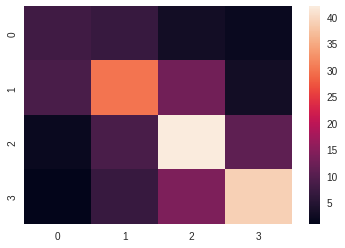

In [117]:
c = pyanno.measures.agreement.confusion_matrix(anno.annotations[:,0], anno.annotations[:,1],4)
print(c)
ac = seaborn.heatmap(c)
plt.show()

Scott's $\pi$ is computed as:

$\pi = \frac{\text{Pr}(a)-\text{Pr}(e)}{1-\text{Pr}(e)}$

Where Pr($a$) is relative observed agreement, and Pr($e$) is expected agreement using joint proportions calculated from the confusion matrix or matrix of coded agreements between any two coders:

In [118]:
scotts_pi(anno.annotations[:,0], anno.annotations[:,1])

0.4386478265891502

The generalization of Scott's $\pi$ to $n$ coders is Fleiss' $\kappa$ (Fleiss called it $\kappa$ because he thought he was generalizing Cohen's $\kappa$)

In [119]:
fleiss_kappa(anno.annotations[::])

0.40417653771912765

Krippendorff's $\alpha$ generalizes of Fleiss' $\kappa$ to $n$ coders and takes into account the fact that annotations here are not categorically different, but ordinal, by adding a weight matrix in which off-diagonal cells contain weights indicating the seriousness of the disagreement between each score. When produced with no arguments, it simply produces an arithmetic distance (e.g., 3-1=2), such that cells one off the diagonal are weighted 1, two off 2, etc.

In [120]:
krippendorffs_alpha(anno.annotations[::])

0.6472588223831547

Like Scott's $\pi$, Cohen's $\kappa$ also takes into account the possibility of the agreement occurring by chance, but in the following way:

$\kappa = \frac{p_o-p_e}{1-p_e}=1-\frac{1-p_o}{p_e}$

where $p_o$ is the relative observed agreement among raters, and $p_e$ is the hypothetical probability of chance agreement, using the observed data to calculate the probabilities of each observer randomly saying each category. If the raters are in complete agreement then $\kappa = 1$. If there is no agreement among the raters other than what would be expected by chance (as given by $p_e$), $\kappa ≤ 0 $. Here, Cohen's $\kappa$ statistic for the first two annotators is computed. This is probably the most common metric of agreement.

In [121]:
cohens_kappa(anno.annotations[:,0], anno.annotations[:,1])

0.43917037219392857

In [122]:
m = pairwise_matrix(cohens_kappa, anno.annotations)
print(m)

[[1.         0.43917037 0.47677621        nan        nan        nan
  0.45819119 0.43381462]
 [0.43917037 1.         0.38432922 0.41344423        nan        nan
         nan 0.33643611]
 [0.47677621 0.38432922 1.         0.39583333 0.51704894        nan
         nan        nan]
 [       nan 0.41344423 0.39583333 1.         0.34597068 0.4446844
         nan        nan]
 [       nan        nan 0.51704894 0.34597068 1.         0.37938644
  0.43039733        nan]
 [       nan        nan        nan 0.4446844  0.37938644 1.
  0.38341929 0.31214748]
 [0.45819119        nan        nan        nan 0.43039733 0.38341929
  1.         0.394806  ]
 [0.43381462 0.33643611        nan        nan        nan 0.31214748
  0.394806   1.        ]]


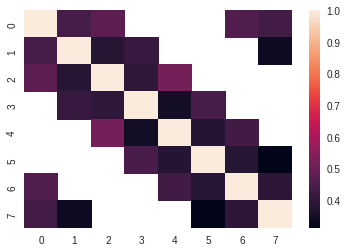

In [123]:
ax = seaborn.heatmap(m)
plt.show()

You can imagine that this 8 by 3 loop design will be less stable than an 8 choose 3 combinatorial design, because each codes with more others. 

One can also assess the average Cohen's $\kappa$ for all pairs of coders that have coded against one another:

In [124]:
def pairwise_metric_average(metric, array):
    """Calculate the pairwise metric average for the real elements of metric function run on an array of annotations"""
    p = permutations(range(array[0,:].size),2)
    m = [metric(array[:,x[0]], array[:,x[1]]) for x in p]
    clean_m = [c for c in m if not math.isnan(c)]
    return reduce(lambda a, b: a + b, clean_m)/len(clean_m)    
 
pairwise_metric_average(cohens_kappa, anno.annotations)

0.40911598940065674

As recognized with Krippendorff's flexible $\alpha$, our scores are *not* categorical, but rather ordered and her considered metric. Weighted $\kappa$ allows you to count disagreements differently and is useful when codes are ordered as they are here. Here a weight matrix is added to the calculation, in which off-diagonal cells contain weights indicating the seriousness of the disagreement between each score. When automatically produced, it simply produces an arithmetic distance (e.g., 3-1=2), such that cells one off the diagonal are weighted 1, two off 2, etc. Here

$\kappa = 1-\frac{\sum^k_{i=1}\sum^k_{j=1}w_{ij}x_{ij}}{\sum^k_{i=1}\sum^k_{j=1}w_{ij}m_{ij}}$

where $\kappa$ = $n$ codes and $w_{ij}$,$x_{ij}$, and $m_{ij}$ represent elements in the weight, observed, and expected matrices, respectively. (Obviously, when diagonal cells contain weights of 0 and off-diagonal cells weights of 1, this equals $\kappa$).

In [125]:
cohens_weighted_kappa(anno.annotations[:,0], anno.annotations[:,1])

0.5330240507874497

Or averaged over the total:

In [126]:
pairwise_metric_average(cohens_weighted_kappa,anno.annotations)

0.5299113458717166

Alternatively, if the annontation data can be understood as indicating real values, we can assess not agreement, but rather the correlation of values (Pearson's $\rho$) or correlation of ranks (Spearman's $\rho$) for pairs of coders:

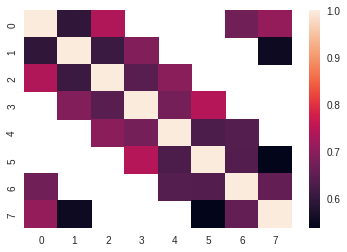

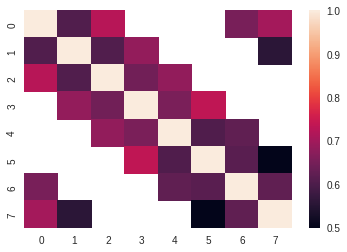

In [127]:
n = pairwise_matrix(pearsons_rho, anno.annotations)
m = pairwise_matrix(spearmans_rho, anno.annotations)
an = seaborn.heatmap(n)
plt.show()
am = seaborn.heatmap(m)
plt.show()

Or averaged over all comparable pairs:

In [128]:
print(pairwise_metric_average(pearsons_rho,anno.annotations), pairwise_metric_average(spearmans_rho,anno.annotations))

0.6517219321175077 0.63808488688039


## Models

However, what if some coders are better than others. The prior measures all rely on the assumption that all coders are equally good. What if some are worse than others? Now we use Rzhetsky et al (2009) and Dawid & Skene's models to make inference about true label classes by downweighting bad or deviant coders. Pyanno provides three relevant models: ModelA, ModelB, and ModelBt. Model A can only be currently run on a balanced 8-coder design, but assesses accuracy purely based on agreement. Model B with $\theta$s models the relationship between each coder and code. Model B is the Dawid & Skene model from the reading. The following image schematically suggests the relationship between the models. 

[Link to model image](https://drive.google.com/file/d/1fm2zgKqNT3DfhEc1rW7-33G-zu5fBSj3/view?usp=sharing)

The models should provide similar results. To estimate the parameters for any models, we first need to create a new model. 

In [129]:
# create a new instance of model A, with 4 label classes
model = ModelB.create_initial_state(4, 8)
# other model parameters are initialized from the model prior
print(model.theta)
print(model.log_likelihood(anno.annotations))

[[[6.88173441e-01 1.95028688e-01 4.08357262e-02 7.59621446e-02]
  [9.77968575e-02 6.34835858e-01 2.57110073e-01 1.02572110e-02]
  [4.24580466e-02 2.04831385e-01 5.02634314e-01 2.50076255e-01]
  [3.38625075e-02 1.01345809e-01 1.90493863e-01 6.74297821e-01]]

 [[7.25718101e-01 1.66736423e-01 6.46813180e-02 4.28641578e-02]
  [2.70259663e-01 5.06241726e-01 1.62829841e-01 6.06687696e-02]
  [2.46084999e-01 1.42672838e-01 4.79705094e-01 1.31537069e-01]
  [3.22935898e-02 1.32930738e-01 2.30011584e-01 6.04764088e-01]]

 [[7.25967882e-01 1.61892058e-01 4.39079392e-02 6.82321209e-02]
  [2.27196008e-01 4.50603020e-01 2.64513110e-01 5.76878618e-02]
  [9.64639811e-02 1.88170049e-01 4.95532210e-01 2.19833759e-01]
  [6.40319509e-02 3.11031194e-02 9.83901199e-02 8.06474810e-01]]

 [[6.46066017e-01 2.03312909e-01 1.13318522e-01 3.73025521e-02]
  [1.76925915e-01 6.50590492e-01 1.34787341e-01 3.76962522e-02]
  [5.76234255e-02 1.46157925e-01 5.82201172e-01 2.14017477e-01]
  [4.01475586e-02 1.33400670e-01 3

In [130]:
samples = model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)

Pyanno allows one to use either MLE (maximum likelihood estimation) or MAP (maximum a posteriori estimation) to estimate model parameters. Note that the parameters here correspond to our estimation of the accuracy of each annotator.

In [131]:
model.map(anno.annotations)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[[[7.73398728e-01 2.01020245e-01 2.55810269e-02 1.20101219e-26]
  [1.47832659e-01 7.11503767e-01 7.66499157e-02 6.40136580e-02]
  [1.97431020e-02 1.48708709e-01 6.96639326e-01 1.34908863e-01]
  [2.52463780e-18 2.13647377e-02 8.51550428e-02 8.93480220e-01]]

 [[7.19395465e-01 2.01828761e-01 7.87757734e-02 1.55486964e-13]
  [1.33941799e-01 7.07223261e-01 1.10418200e-01 4.84167403e-02]
  [2.72093282e-02 1.65178369e-01 6.71232700e-01 1.36379603e-01]
  [2.15358721e-30 5.38211823e-02 1.21871740e-01 8.24307077e-01]]

 [[8.50073137e-01 1.22955501e-01 2.69713621e-02 3.64395738e-42]
  [8.93514251e-02 7.89280333e-01 8.93429608e-02 3.20252811e-02]
  [6.11638366e-02 1.29121422e-01 7.03992731e-01 1.05722011e-01]
  [6.53666390e-03 5.12606512e-02 2.10869595e-01 7.31333090e-01]]

 [[6.99612801e-01 2.70976969e-01 2.94102301e-02 8.57899704e-52]
  [9.67171336e-02 7.62615701e-01 1.09523823e-01 3.11433425e-02]
  [1.81150586e-02 1.45472330e-01 6.85587954e-01 1.50824657e-01]
  [2.71897111e-47 2.98511124e-02 2

In [132]:
model = ModelB.create_initial_state(4, 8)
model.map(anno.annotations)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[[[7.73398728e-01 2.01020245e-01 2.55810269e-02 1.20101219e-26]
  [1.47832659e-01 7.11503767e-01 7.66499157e-02 6.40136580e-02]
  [1.97431020e-02 1.48708709e-01 6.96639326e-01 1.34908863e-01]
  [2.52463780e-18 2.13647377e-02 8.51550428e-02 8.93480220e-01]]

 [[7.19395465e-01 2.01828761e-01 7.87757734e-02 1.55486964e-13]
  [1.33941799e-01 7.07223261e-01 1.10418200e-01 4.84167403e-02]
  [2.72093282e-02 1.65178369e-01 6.71232700e-01 1.36379603e-01]
  [2.15358721e-30 5.38211823e-02 1.21871740e-01 8.24307077e-01]]

 [[8.50073137e-01 1.22955501e-01 2.69713621e-02 3.64395738e-42]
  [8.93514251e-02 7.89280333e-01 8.93429608e-02 3.20252811e-02]
  [6.11638366e-02 1.29121422e-01 7.03992731e-01 1.05722011e-01]
  [6.53666390e-03 5.12606512e-02 2.10869595e-01 7.31333090e-01]]

 [[6.99612801e-01 2.70976969e-01 2.94102301e-02 8.57899704e-52]
  [9.67171336e-02 7.62615701e-01 1.09523823e-01 3.11433425e-02]
  [1.81150586e-02 1.45472330e-01 6.85587954e-01 1.50824657e-01]
  [2.71897111e-47 2.98511124e-02 2

Once we have model parameters estimated, we can now make inferences about the true label classes. We can calculate the posterior distribution over the true label classes.

In [133]:
posterior = model.infer_labels(anno.annotations)
print(posterior)

[[1.20741380e-42 1.00240780e-01 7.90821679e-01 1.08937540e-01]
 [9.92682453e-01 7.07056554e-03 2.46981317e-04 2.03944498e-49]
 [1.07420297e-03 5.51435353e-02 9.37476514e-01 6.30574822e-03]
 ...
 [8.15378491e-04 3.51193436e-02 9.59859130e-01 4.20614824e-03]
 [1.34481992e-44 2.14447325e-03 9.16166870e-01 8.16886569e-02]
 [2.14745550e-01 7.69057353e-01 1.61970966e-02 2.01807019e-26]]


Let's turn the posterior of the first 100 samples into a heatmap.

In [134]:
votes = []
for r in anno.annotations:
    v = [0] * len(anno.labels)
    votes.append(v)
    for a in r:
        if a > -1:
            v[a] += 1
votes_array = np.array(votes)

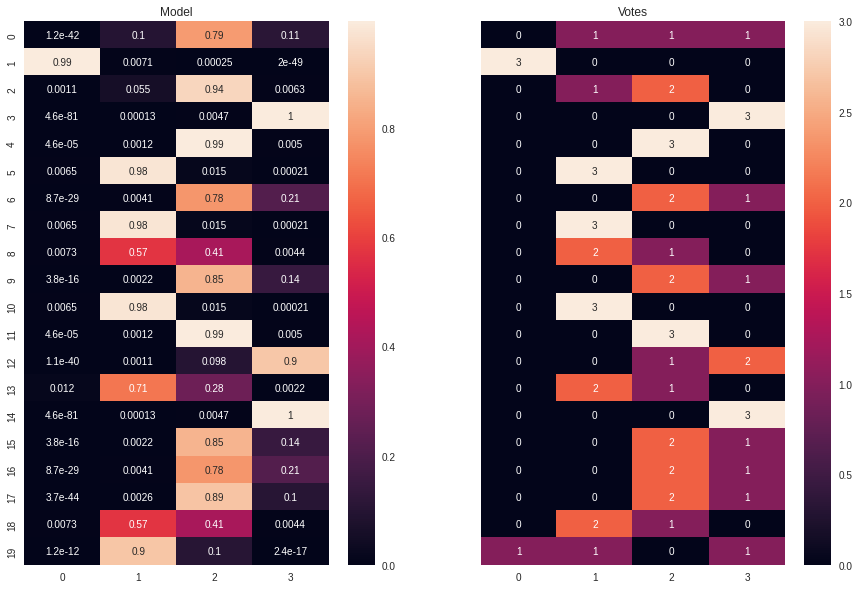

In [135]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15, 10), sharey=True)
num_questions = 20

seaborn.heatmap(votes_array[:num_questions], annot = True, ax=ax2)
seaborn.heatmap(posterior[:num_questions], annot=True, ax =ax1)
ax1.set_title("Model")
ax2.set_title("Votes")
plt.show()

This differs markedly from taking annotator scores at face value (Add comparison of average values)

In [136]:
samples = model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)

In [137]:
print(samples[0].mean(axis=0))
print(samples[0].std(axis=0))

[[[0.7227508  0.20665479 0.04850088 0.02209352]
  [0.14097931 0.69986083 0.09257804 0.06658182]
  [0.02839194 0.15470967 0.68385111 0.13304728]
  [0.01262612 0.03260241 0.10609126 0.84868022]]

 [[0.66887375 0.20656949 0.09090454 0.03365221]
  [0.13190474 0.69924438 0.11946675 0.04938413]
  [0.03559728 0.16174224 0.66636293 0.13629755]
  [0.0111257  0.06509313 0.13408701 0.78969415]]

 [[0.78396804 0.14934862 0.04554463 0.02113871]
  [0.09961787 0.74624186 0.11087048 0.04326979]
  [0.06679817 0.13548999 0.69236991 0.10534193]
  [0.01511644 0.06024164 0.22206858 0.70257334]]

 [[0.65153312 0.27954352 0.04934832 0.01957504]
  [0.10912875 0.73126145 0.1179615  0.0416483 ]
  [0.02531015 0.15650175 0.67097993 0.14720816]
  [0.00892404 0.03923172 0.23545829 0.71638594]]

 [[0.76311927 0.13726319 0.08084952 0.01876803]
  [0.12693648 0.67749898 0.14828633 0.04727821]
  [0.01910496 0.2100042  0.64351912 0.12737173]
  [0.00855788 0.08225399 0.18138496 0.72780317]]

 [[0.72227417 0.21505011 0.043

Let's try everything again with ModelBt

In [138]:
# create a new instance of model B, with 4 label classes and 8 annotators.
model = ModelBt.create_initial_state(4, 8)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[0.64060276 0.75594243 0.74852159 0.83379991 0.94639888 0.94665814
 0.63681388 0.68163973]
-3143.4085402281003


In [139]:
model.map(anno.annotations)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[0.79125913 0.74082366 0.76221558 0.72521397 0.71643465 0.71858887
 0.77316327 0.71667757]
-2811.946221999158


In [140]:
posterior = model.infer_labels(anno.annotations)
print(posterior)

[[0.01110227 0.28925467 0.36507499 0.33456807]
 [0.99022248 0.00241925 0.00404924 0.00330903]
 [0.00249933 0.05506509 0.93460341 0.00783216]
 ...
 [0.0025287  0.04396399 0.94558314 0.00792417]
 [0.00249369 0.00571319 0.93249193 0.05930119]
 [0.031889   0.93882846 0.01611412 0.01316843]]


Let's visualize the posterior of the first 10 samples according to ModelBt.

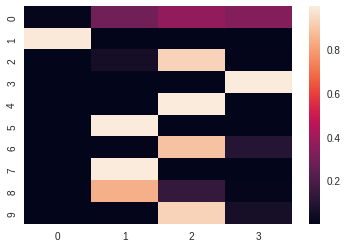

In [141]:
ax = seaborn.heatmap(posterior[:10,])
plt.show()

The property of these scores is that they enable us to identify the most likely code assuming coders of unequal quality, which also allows us to break ties when we know coder identity. For some analyses, we may simply use the posterior themselves rather than the most probably code outcome.

## Generating Annotations

Pyanno also allows one to generate artificial data from a model.

In [142]:
model = ModelBt.create_initial_state(4, 3, theta=[0.99,0.75,0.25])
#randome generate annotations with 4 label classes and 3 annotators. The accuracy of the three annotators are 0.99, 0.75, and 0.25 respectively.
model.generate_annotations(20)

array([[2, 1, 1],
       [0, 0, 3],
       [1, 1, 0],
       [0, 0, 0],
       [0, 0, 1],
       [2, 2, 3],
       [1, 1, 0],
       [0, 3, 1],
       [3, 3, 2],
       [0, 1, 3],
       [0, 0, 2],
       [3, 3, 1],
       [2, 2, 3],
       [3, 0, 1],
       [1, 1, 2],
       [0, 0, 2],
       [3, 3, 0],
       [2, 3, 2],
       [2, 2, 1],
       [0, 3, 3]])

## Visualizing coder accuracy

Pyanno provides a [graphical user interface](http://docs.enthought.com/uchicago-pyanno/user_guide.html) for making plots. However, it is not compatible with ipython notebooks. Nevertheless, nothing prevents us from making plots using matplotlib. Let's make a plot of the accuracy of each annotator inferred from ModelA.

In [143]:
model = ModelBt.create_initial_state(4, 8)
model.mle(anno.annotations)
samples = model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)
y =  samples.mean(axis=0)#.mean(axis = 1).mean(axis = 1)
y_ci = samples.std(axis=0)#.mean(axis = 1).mean(axis = 1)

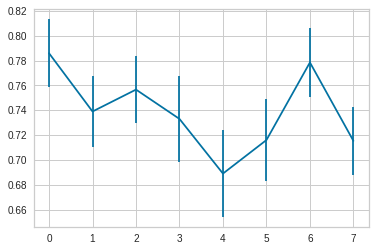

In [144]:
plt.figure()
plt.errorbar(range(8),y, yerr = y_ci)
plt.show()

## Example with articles that use the General Social Survey

We performed a recent study in which the variables from thousands of articles were associated with those used in the General Social Survey, a widely used population sample, in order to interrogate how social science analyses are performed. Each article was reread and coded by a balanced set of three student coders using a 6 choose 3 design, such that all possible 3-coder-subsets (20) coded an equal number of articles. Coding was performed through a website that allowed students access to the digital article. To evaluate the validity of the student codes, we also recruited a sample of authors associated with 97 of our published articles to fill out the same online survey. 

Because not all coders coded items with equal accuracy, and because “don’t know” was an optional answer, leading to potential ties, we used a generative, probabilistic model to estimate the maximum a posteriori probability (MAP) prediction that an item’s code is true, which integrates over the estimated accuracy of coders, assuming only that the entire population of coders is slightly more often right than wrong. The model (“Model B”) is based on a simple underlying generation process that directly accounts for the probability that coded values are correct (Rzhetsky et al. 2009). For each coded value j, a set of parameters, denoted γj, represents the probability that each coded value is correct. For the ith coder (i = 1, 2, …, 6), we introduce a matrix of probabilities, denoted λ(i)x|y, that defines the probability that she assigns code x (e.g., Dependent variable) to a GSS variable with correct annotation y. For a perfect coder, the matrix λ(i)x|y would equal the identity matrix and her vote would count most toward the total. For a coder that always codes incorrectly—a “troll”—her matrix λ(i)x|y will have all its value off the diagonal and will only minimally influence the posterior. We co-authored the open source pyanno software that implements this model.

Getting the data for each content analysis survey regarding how GSS variables were used in a large population of social science articles.

In [145]:
#anno_vdep = AnnotationsContainer.from_file(missing_values=[-1], filename="GSSvariable_testSdependent.csv")
dev = np.loadtxt(fname="/content/n7GSSvariable_testSdependent.csv", dtype=int, delimiter=",")
anno_dv = AnnotationsContainer.from_array(dev)

ind = np.loadtxt(fname="/content/n7GSSvariable_testSindependent.csv", dtype=int, delimiter=",")
anno_iv = AnnotationsContainer.from_array(ind)

cent = np.loadtxt(fname="/content/n7GSSvariable_testScentral.csv", dtype=int, delimiter=",")
anno_cv = AnnotationsContainer.from_array(cent)

cont = np.loadtxt(fname="/content/n7GSSvariable_testScontrol.csv", dtype=int, delimiter=",")
anno_ctv = AnnotationsContainer.from_array(cont)

test = np.loadtxt(fname="/content/testH.csv", dtype=int, delimiter=",")
anno_test = AnnotationsContainer.from_array(test)

Let's examine the data structure.

In [146]:
dev.shape

(21461, 6)

In [147]:
anno_dv.labels

[0, 1]

In [148]:
anno_dv.missing_values

[-1]

In [149]:
anno_dv.annotations.shape

(21461, 6)

First, let's use Cohen's $\kappa$ to measure agreement between coders...

In [150]:
m = pairwise_matrix(cohens_kappa, anno_dv.annotations)
print(m)

[[1.         0.62426874 0.46682841 0.44599604 0.16569888 0.36657805]
 [0.62426874 1.         0.53480937 0.52673854 0.3306905  0.59513211]
 [0.46682841 0.53480937 1.         0.50580068 0.42393752 0.49833997]
 [0.44599604 0.52673854 0.50580068 1.         0.46517493 0.47023754]
 [0.16569888 0.3306905  0.42393752 0.46517493 1.         0.66190749]
 [0.36657805 0.59513211 0.49833997 0.47023754 0.66190749 1.        ]]


Let's visualize that...

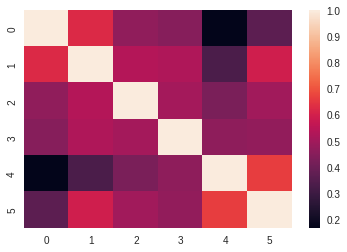

In [151]:
ax = seaborn.heatmap(m)
plt.show()

In [152]:
pairwise_metric_average(cohens_kappa, anno_dv.annotations)

0.4721425844540702

Let's compute the statistics on each of the datasets and with Pearson's $\rho$. 

In [153]:
datasets = [anno_dv.annotations, anno_iv.annotations, anno_cv.annotations, anno_ctv.annotations]
ck = [pairwise_matrix(cohens_kappa, anno) for anno in datasets]
pr = [pairwise_matrix(pearsons_rho, anno) for anno in datasets]
titles = ['DV', 'IV', 'Central Variable', "Control Variable"]

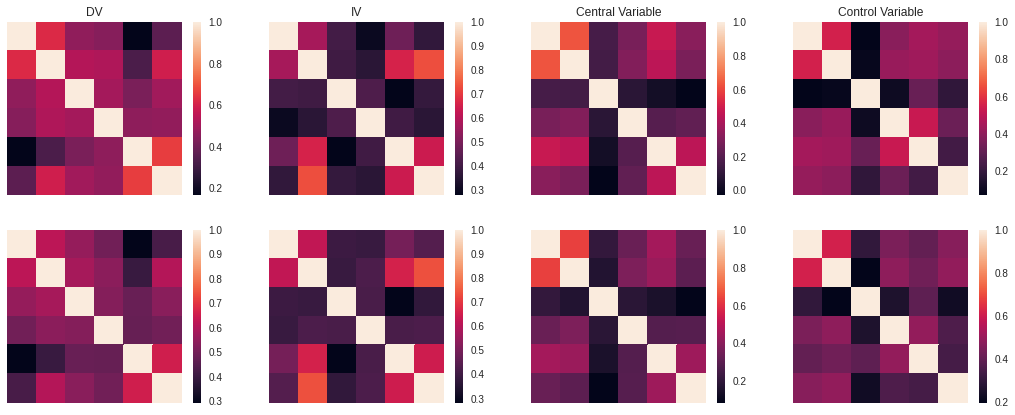

In [154]:
fig, axs = plt.subplots(2,4)
fig.set_size_inches(18, 7)
for k, ax, title in zip(ck,axs[0], titles):
    seaborn.heatmap(k, ax = ax)
    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())
for r, ax in zip(pr,axs[1]):
    seaborn.heatmap(r, ax = ax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

Now we will compare the student coders.

In [155]:
nondiag = (np.eye(6)-np.ones(6))*-1.0

In [156]:
xdevck = pairwise_matrix(cohens_kappa, anno_dv.annotations)
xdevpr = pairwise_matrix(pearsons_rho, anno_dv.annotations)

xindck = pairwise_matrix(cohens_kappa, anno_iv.annotations)
xindpr = pairwise_matrix(pearsons_rho, anno_iv.annotations)

xcenck = pairwise_matrix(cohens_kappa, anno_cv.annotations)
xcenpr = pairwise_matrix(pearsons_rho, anno_cv.annotations)

xconck = pairwise_matrix(cohens_kappa, anno_ctv.annotations)
xconpr = pairwise_matrix(pearsons_rho, anno_ctv.annotations)

print(np.average(xdevck, weights=nondiag))
print(np.average(xdevpr, weights=nondiag))
print(np.average(xindck, weights=nondiag))
print(np.average(xindpr, weights=nondiag))
print(np.average(xcenck, weights=nondiag))
print(np.average(xcenpr, weights=nondiag))
print(np.average(xconck, weights=nondiag))
print(np.average(xconpr, weights=nondiag))

0.47214258445407015
0.5142407278222342
0.4529627823703711
0.47596526866863437
0.27082376869768193
0.3151404982836273
0.32833477875850064
0.39458527791963466


Now we are going to bring in "gold standard" data. In this case, this is where we asked authors of the articles to code their own article's variables and compare with our student coders.

In [157]:
mergedata = np.loadtxt(fname="/content/gss_mergedataC.txt", dtype=int, delimiter="\t")

In [158]:
anno_merge_dep = AnnotationsContainer.from_array(mergedata[:,0:2])
anno_merge_ind = AnnotationsContainer.from_array(mergedata[:,2:4])
anno_merge_cen = AnnotationsContainer.from_array(mergedata[:,4:6])
anno_merge_con = AnnotationsContainer.from_array(mergedata[:,6:8])
anno_merge_dkn = AnnotationsContainer.from_array(mergedata[:,8:10])

In [159]:
print("""Dependent variable -- kappa & rho""")
print(cohens_kappa(anno_merge_dep.annotations[:,0], anno_merge_dep.annotations[:,1]))
print(pearsons_rho(anno_merge_dep.annotations[:,0], anno_merge_dep.annotations[:,1]))

print("\nIndependent variable")
print(cohens_kappa(anno_merge_ind.annotations[:,0], anno_merge_ind.annotations[:,1]))
print(pearsons_rho(anno_merge_ind.annotations[:,0], anno_merge_ind.annotations[:,1]))

print("\nCentral variable")
print(cohens_kappa(anno_merge_cen.annotations[:,0], anno_merge_cen.annotations[:,1]))
print(pearsons_rho(anno_merge_cen.annotations[:,0], anno_merge_cen.annotations[:,1]))

print("\nControl variable")
print(cohens_kappa(anno_merge_con.annotations[:,0], anno_merge_con.annotations[:,1]))
print(pearsons_rho(anno_merge_con.annotations[:,0], anno_merge_con.annotations[:,1]))

Dependent variable -- kappa & rho
0.3744311057948666
0.38563437203620643

Independent variable
0.5430690164641346
0.5529974941771468

Central variable
-0.064017189548477
-0.08887644319259189

Control variable
0.2815172499181942
0.28239237574620263


Whoah! Student coders and authors viewed articles that were "central" or critical to the published argument as fundamentally different (exhibiting negative agreement and correlation). Why? Likely because that researchers recalled what they had _intended_ as their central variables before analysis, but those that _worked out_ became central in the text.

Now for the assessment of the relative values of authors, then student coders.

In [160]:
print("Dependent")
print(np.average(anno_merge_dep.annotations[:,0]))
print(np.average(anno_merge_dep.annotations[:,1]))

print("\nIndependent")
print(np.average(anno_merge_ind.annotations[:,0]))
print(np.average(anno_merge_ind.annotations[:,1]))

print("\nCentral")
print(np.average(anno_merge_cen.annotations[:,0]))
print(np.average(anno_merge_cen.annotations[:,1]))

print("\nControl")
print(np.average(anno_merge_con.annotations[:,0]))
print(np.average(anno_merge_con.annotations[:,1]))

Dependent
0.4763912310286678
0.35834738617200673

Independent
0.23777403035413153
0.3136593591905565

Central
0.35328836424957843
0.7512647554806071

Control
0.081787521079258
0.09443507588532883


## Now we are going to use models to predict the correct annotations

Recall that Model A is built for 8 coders, but we have 6. We're going to *hack* it by adding two blank columns.

In [161]:
dev.shape

(21461, 6)

In [162]:
negs2 = np.ones((21461, 2), dtype=np.int)*(-1)
devA = np.concatenate((dev, negs2), axis=1)
devA

array([[ 0, -1, -1, ...,  1, -1, -1],
       [ 0, -1, -1, ...,  0, -1, -1],
       [ 0, -1, -1, ...,  0, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

In [163]:
anno_dvA = AnnotationsContainer.from_array(devA)
model_devA = ModelA.create_initial_state(2)
model_devA.theta

array([0.63854051, 0.74184867, 0.86153109, 0.60042619, 0.76142615,
       0.85134319, 0.75366678, 0.91529722])

In [164]:
model_dvB = ModelB.create_initial_state(2, 6)
print(model_dvB.pi)
print(model_dvB.log_likelihood(anno_dv.annotations))

[0.98086207 0.01913793]
-30064.87494541451


In [165]:
model_dvB.map(anno_dv.annotations)
print(model_dvB.pi)
print(model_dvB.log_likelihood(anno_dv.annotations))

[0.69455487 0.30544513]
-25462.473635032595


In [166]:
# compute the posterior distribution over true annotations
posterior_dvB = model_dvB.infer_labels(anno_dv.annotations)
# each row show the probability of each label class for the
# corresponding item
print(posterior)

[[0.01110227 0.28925467 0.36507499 0.33456807]
 [0.99022248 0.00241925 0.00404924 0.00330903]
 [0.00249933 0.05506509 0.93460341 0.00783216]
 ...
 [0.0025287  0.04396399 0.94558314 0.00792417]
 [0.00249369 0.00571319 0.93249193 0.05930119]
 [0.031889   0.93882846 0.01611412 0.01316843]]


In [167]:
samples_dvB = model_dvB.sample_posterior_over_accuracy(anno_dv.annotations, 200, burn_in_samples=100, thin_samples=3)

In [168]:
# we can then compute a credible interval for the parameters:
ci_dv_mean = samples_dvB[0].mean(axis=0)
print("Mean")
print(ci_dv_mean)

ci_dv_stdev = samples_dvB[0].std(axis=0)
print("\nSTD")
print(ci_dv_stdev)


Mean
[[[0.97902683 0.02097317]
  [0.51663305 0.48336695]]

 [[0.96933992 0.03066008]
  [0.26027328 0.73972672]]

 [[0.98306209 0.01693791]
  [0.34720187 0.65279813]]

 [[0.93492288 0.06507712]
  [0.24035678 0.75964322]]

 [[0.6928177  0.3071823 ]
  [0.04641056 0.95358944]]

 [[0.86412668 0.13587332]
  [0.06929264 0.93070736]]]

STD
[[[0.00232012 0.00232012]
  [0.01189118 0.01189118]]

 [[0.0030593  0.0030593 ]
  [0.01275248 0.01275248]]

 [[0.00312124 0.00312124]
  [0.0126304  0.0126304 ]]

 [[0.00445454 0.00445454]
  [0.01252819 0.01252819]]

 [[0.00655019 0.00655019]
  [0.00587226 0.00587226]]

 [[0.00645084 0.00645084]
  [0.00737837 0.00737837]]]


We will use Model B estimates for other variable assessments.

In [169]:
#test
model_testB = ModelB.create_initial_state(2, 6)
print(model_testB.log_likelihood(anno_test.annotations))
model_testB.map(anno_test.annotations)
print(model_testB.pi)
print(model_testB.log_likelihood(anno_test.annotations))
print(anno_test.annotations.shape)
posterior_testB = model_testB.infer_labels(anno_test.annotations)
print(posterior_testB.shape)
samples_testB = model_testB.sample_posterior_over_accuracy(anno_test.annotations, 200, burn_in_samples=100, thin_samples=3)
ci_test_mean = samples_testB[0].mean(axis=0)
print(ci_test_mean)

-110.45079890342068
[9.20933481e-20 1.00000000e+00]
-48.9756711393957
(48, 6)
(48, 2)
[[[0.80655746 0.19344254]
  [0.12214303 0.87785697]]

 [[0.80878018 0.19121982]
  [0.08777811 0.91222189]]

 [[0.79821124 0.20178876]
  [0.49625083 0.50374917]]

 [[0.78650877 0.21349123]
  [0.06993633 0.93006367]]

 [[0.80569681 0.19430319]
  [0.36394137 0.63605863]]

 [[0.79364579 0.20635421]
  [0.12536813 0.87463187]]]


In [170]:
#indepedent variables
model_ivB = ModelB.create_initial_state(2, 6)
print(model_ivB.log_likelihood(anno_iv.annotations))
model_ivB.map(anno_iv.annotations)
print(model_ivB.pi)
print(model_ivB.log_likelihood(anno_iv.annotations))
print(anno_iv.annotations.shape)
posterior_ivB = model_ivB.infer_labels(anno_iv.annotations)
print(posterior_ivB.shape)
samples_ivB = model_ivB.sample_posterior_over_accuracy(anno_iv.annotations, 200, burn_in_samples=100, thin_samples=3)
ci_iv_mean = samples_ivB[0].mean(axis=0)
print(ci_iv_mean)

#central variables
model_cvB = ModelB.create_initial_state(2, 6)
print(model_cvB.log_likelihood(anno_cv.annotations))
model_cvB.map(anno_cv.annotations)
print(model_cvB.pi)
print(model_cvB.log_likelihood(anno_cv.annotations))
print(anno_cv.annotations.shape)
posterior_cvB = model_cvB.infer_labels(anno_cv.annotations)
print(posterior_cvB.shape)
samples_cvB = model_cvB.sample_posterior_over_accuracy(anno_cv.annotations, 200, burn_in_samples=100, thin_samples=3)
ci_cv_mean = samples_cvB[0].mean(axis=0)
print(ci_cv_mean)

#control variables
model_ctvB = ModelB.create_initial_state(2, 6)
print(model_ctvB.log_likelihood(anno_ctv.annotations))
model_ctvB.map(anno_ctv.annotations)
print(model_ctvB.pi)
print(model_ctvB.log_likelihood(anno_ctv.annotations))
print(anno_ctv.annotations.shape)
posterior_ctvB = model_ctvB.infer_labels(anno_ctv.annotations)
print(posterior_ctvB.shape)
samples_ctvB = model_ctvB.sample_posterior_over_accuracy(anno_iv.annotations, 200, burn_in_samples=100, thin_samples=3)
ci_ctv_mean = samples_ctvB[0].mean(axis=0)
print(ci_ctv_mean)

-35243.47672914051
[0.61093546 0.38906454]
-28620.66523246587
(21461, 6)
(21461, 2)
[[[0.97030589 0.02969411]
  [0.34696076 0.65303924]]

 [[0.93701758 0.06298242]
  [0.05081971 0.94918029]]

 [[0.65771202 0.34228798]
  [0.21038299 0.78961701]]

 [[0.53643234 0.46356766]
  [0.02988472 0.97011528]]

 [[0.87464439 0.12535561]
  [0.09785033 0.90214967]]

 [[0.88963394 0.11036606]
  [0.08944622 0.91055378]]]
-38479.72100672029
[0.23988844 0.76011156]
-25034.918555765576
(21461, 6)
(21461, 2)
[[[0.88954094 0.11045906]
  [0.06855258 0.93144742]]

 [[0.77974032 0.22025968]
  [0.05751562 0.94248438]]

 [[0.99206615 0.00793385]
  [0.84196582 0.15803418]]

 [[0.94986148 0.05013852]
  [0.45505102 0.54494898]]

 [[0.67456705 0.32543295]
  [0.05599413 0.94400587]]

 [[0.58982359 0.41017641]
  [0.09453825 0.90546175]]]
-33929.13405219614
[0.83068326 0.16931674]
-19415.702035242168
(21461, 6)
(21461, 2)
[[[0.9708533  0.0291467 ]
  [0.34578615 0.65421385]]

 [[0.93667931 0.06332069]
  [0.05297354 0.94

Now we will package up the predicted data into a format we can use for other, subsequent analysis:

In [171]:
print(posterior_dvB.shape)
print(posterior_ivB.shape)
print(posterior_cvB.shape)
print(posterior_ctvB.shape)

(21461, 2)
(21461, 2)
(21461, 2)
(21461, 2)


In [172]:
predicted_annotations = np.concatenate((posterior_dvB, posterior_ivB, posterior_cvB, posterior_ctvB), axis=1) # posterior_dvBt, posterior_ivBt, posterior_cvBt, posterior_ctvBt), axis=1)

In [173]:
predicted_annotations.shape

(21461, 8)

These annotations allowed us to uncover the degree to which social scientists alter their models to achieve a better fit...undocumented data mining. The answer was that social scientists did mine their data, but that it likely improved their analysis because change in the social world was the result of greater distortion than undocumented data mining.

## Another example analysis looks at a different data set of Hotel Reviews by a variety of patrons.

In [174]:
df_hotels = pandas.read_csv('/content/hot_Reviews.csv', index_col=0)
df_hotels[:5]

,Karen,Scott,Jessica,write a review,A verified traveler,Kevin,William,R,S,Christopher,...,Thomas,Susan,A Traveler,M,Not Provided,B,Laura,xxxxxxxxxxxxxx,Michael,Joseph
1785 Inn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900 House,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bed & Breakfast In Cambridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Swallow's Nest Motel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abbeville Inn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here a rank of 0 is a missing value and to simplify things more we will convert from a 1-10 scale to a 1-5 scale, with 0 as missing

In [175]:
df_hotels = df_hotels.apply(lambda x: x // 2) #integer divide by 2 rounds all values

And we can visualize all the reviews as a heatmap with the missing values greyed out

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


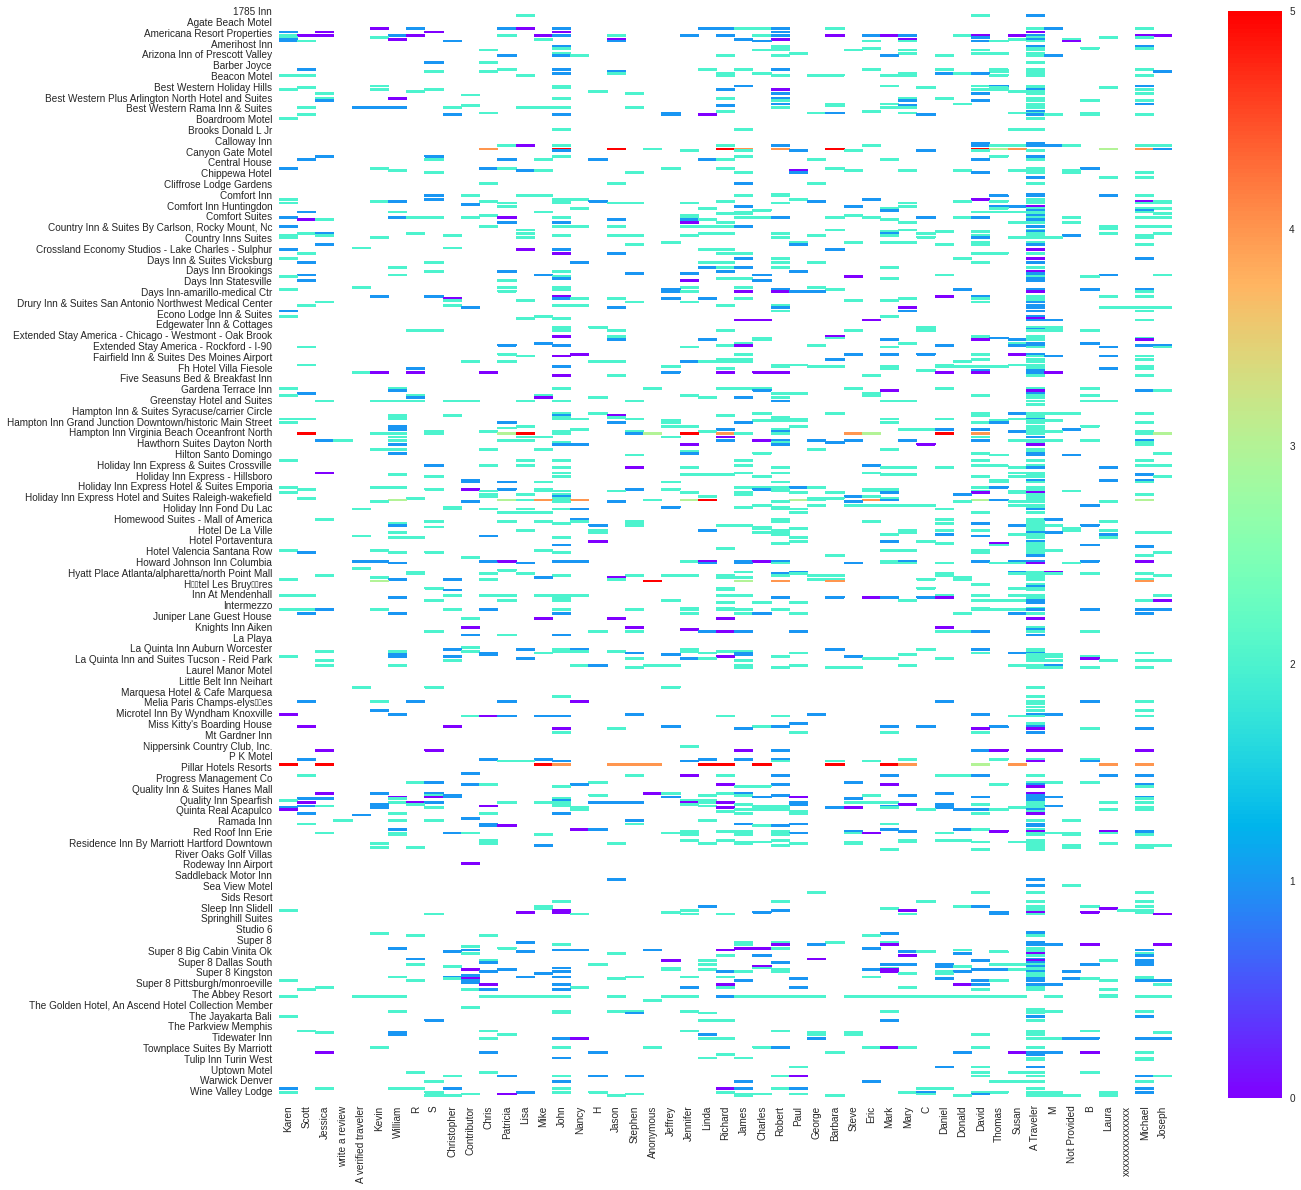

In [176]:
fig, ax = plt.subplots(figsize = (20,20))
seaborn.heatmap(df_hotels, cmap='rainbow', ax = ax)
plt.show()

To give the dataframe to pyanno we need to convert to np array and change the nans to intergers, lets use -1

In [177]:
hot_mat = np.array(df_hotels.fillna(-1).values)
anno_hot = AnnotationsContainer.from_array(hot_mat, missing_values=[-1])

In [178]:
anno_hot.annotations

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

In [179]:
anno_hot.labels

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]

In [180]:
anno_hot.missing_values

[-1]

Look at coder agreement

In [181]:
pyanno.measures.agreement.labels_frequency(anno_hot.annotations, 6)#6 possible catagories

array([0.07806534, 0.26262198, 0.63555367, 0.00636402, 0.0093339 ,
       0.00806109])

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 4. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


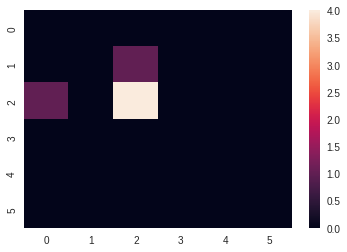

In [182]:
c = pyanno.measures.agreement.confusion_matrix(anno_hot.annotations[:,0], anno_hot.annotations[:,1], 6) #6 possible catagories
print(c)
ac = seaborn.heatmap(c)
plt.show()

Most agreement is on 2 i.e. an average hotel and there's little agreement as rating go higher, likely due to scarcity in the sample

In [183]:
scotts_pi(anno_hot.annotations[:,0], anno_hot.annotations[:,1])

0.3787878787878787

In [184]:
krippendorffs_alpha(anno_hot.annotations[::])

0.398760907615921

In [185]:
cohens_kappa(anno_hot.annotations[:,0], anno_hot.annotations[:,1])

0.40328336902212697

/usr/local/lib/python3.7/dist-packages/pyanno/measures/helpers.py:166: RuntimeWarning: invalid value encountered in double_scalars
  return (observed_agreement - chance_agreement) / (1. - chance_agreement)


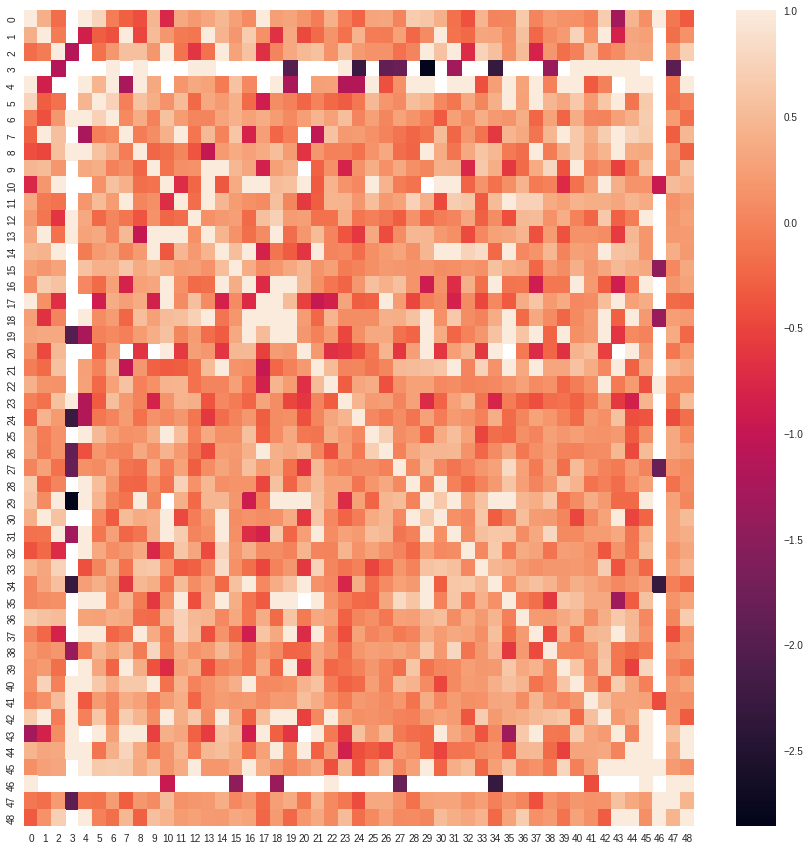

In [186]:
m = pairwise_matrix(cohens_kappa, anno_hot.annotations)
fig, ax = plt.subplots(figsize = (15, 15))
seaborn.heatmap(m, ax =ax)

In [187]:
model_hot = ModelBt.create_initial_state(6, 49)
model_hot.mle(anno_hot.annotations)
print(model.theta)
print(model_hot.log_likelihood(anno_hot.annotations))

[0.79047725 0.73956265 0.76134953 0.72414487 0.71540281 0.71737872
 0.77243568 0.71547768]
-2730.903673573963


In [188]:
def makeQuestionComparison(model, anno_target, num_questions = 20):
    votes = []
    for r in anno_target.annotations:
        v = [0] * len(anno_target.labels)
        votes.append(v)
        for a in r:
            if a > -1:
                v[a] += 1
    votes_array = np.array(votes)
    posterior = model.infer_labels(anno_target.annotations)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15, 10), sharey=True)

    seaborn.heatmap(votes_array[:num_questions], annot = True, ax=ax2)
    seaborn.heatmap(np.nan_to_num(posterior,0)[:num_questions], annot=True, ax =ax1)
    ax1.set_title("Model")
    ax2.set_title("Votes")
    return fig, (ax1, ax2)

(<Figure size 1080x720 with 4 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f814cd50750>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f814ccb1b90>))

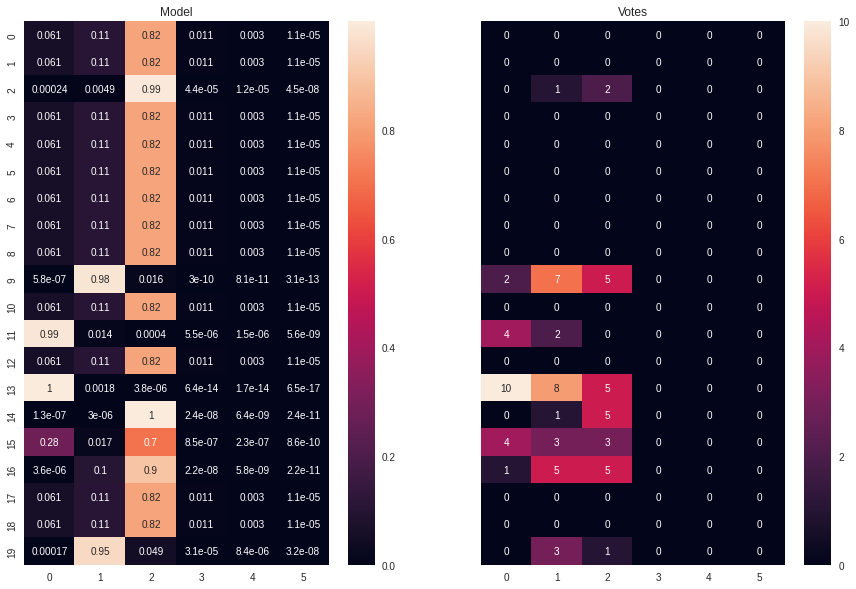

In [189]:
makeQuestionComparison(model_hot, anno_hot)

# Federated Learning — a Decentralized Form of Machine Learning

In Machine Learning, we usually train our data that is aggregated from several edge devices like mobile phones, laptops, etc., and is brought together to a centralized server. Machine Learning algorithms, then grab this data and trains themselves, and finally predicts results for new data generated.

However, this fact has aroused deep concern about user privacy. The AI market is dominated by tech giants such as Google, Amazon and Microsoft, offering cloud-based AI solutions and APIs, and sensitive user data are sent to the servers where models are trained. In the long run, the users' data might be used in an inappropriate way.

Federated learning is one possible solution to the current problem. Federated Learning enables mobile phones to collaboratively learn a shared prediction model while keeping all the training data on device, decoupling the ability to do machine learning from the need to store the data in the cloud. This goes beyond the use of local models that make predictions on mobile devices (like the Mobile Vision API and On-Device Smart Reply) by bringing model training to the device as well.

It works like this: your device downloads the current model, improves it by learning from data on your phone, and then summarizes the changes as a small focused update. Only this update to the model is sent to the cloud, using encrypted communication, where it is immediately averaged with other user updates to improve the shared model. All the training data remains on your device, and no individual updates are stored in the cloud.

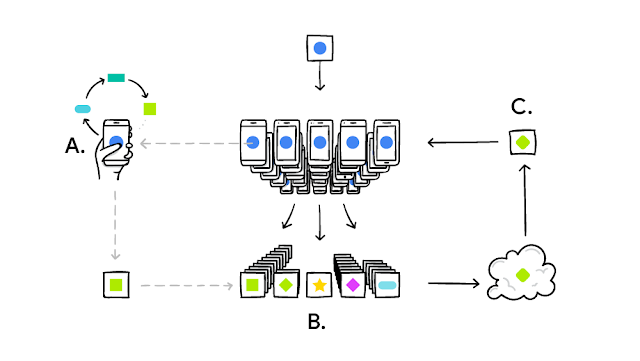




6 steps for federated learning:

1. The centralized machine learning application will have a local copy on all devices.

2. The model will gradually learn and train itself on the information inputted by the user and become smarter, time to time.

3. The devices are then allowed to transfer the training results, from the local copy of the machine learning app, back to the central server--only results, not data!

4. This same process happens across several devices, that have a local copy of the application. The results will be aggregated together in the centralized server.

5. The centralized cloud server now updates its central machine learning model from the aggregated training results, which is now far better than the previously deployed version.

6. The development team now updates the model to a newer version, and users update the application with the smarter model, created from their own data.

Here is an example of applying federated learning on image classification. 

In this tutorial, we use the classic MNIST training example to introduce the Federated Learning (FL) API layer of TFF, tff.learning - a set of higher-level interfaces that can be used to perform common types of federated learning tasks, such as federated training, against user-supplied models implemented in TensorFlow.

This tutorial, and the Federated Learning API, are intended primarily for users who want to plug their own TensorFlow models into TFF, treating the latter mostly as a black box. For a more in-depth understanding of TFF and how to implement your own federated learning algorithms, see the tutorials on the FC Core API - Custom Federated Algorithms at
https://www.tensorflow.org/federated/tutorials/custom_federated_algorithms_1
and 
https://www.tensorflow.org/federated/tutorials/custom_federated_algorithms_2

For more on tff.learning, continue with the Federated Learning for Text Generation, tutorial which in addition to covering recurrent models, also demonstrates loading a pre-trained serialized Keras model for refinement with federated learning combined with evaluation using Keras.

In [190]:
#setup the environment
#After running this cell, restart the kernel before you continues.

!pip install grpcio~=1.37.0
!pip install tf-estimator-nightly~=2.10.0.dev
!pip install --quiet --upgrade tensorflow-federated
!pip install --quiet --upgrade nest-asyncio

import nest_asyncio
nest_asyncio.apply()

     |████████████████████████████████| 4.2 MB 29.5 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.44.0
    Uninstalling grpcio-1.44.0:
      Successfully uninstalled grpcio-1.44.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.


     |████████████████████████████████| 438 kB 23.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, but you have tf-estimator-nightly 2.10.0.dev2022041608 which is incompatible.
     |████████████████████████████████| 819 kB 31.0 MB/s 
     |████████████████████████████████| 121 kB 49.2 MB/s 
     |████████████████████████████████| 53 kB 1.7 MB/s 
     |████████████████████████████████| 251 kB 48.0 MB/s 
     |████████████████████████████████| 887 kB 42.9 MB/s 
     |████████████████████████████████| 65.1 MB 89 kB/s 
     |████████████████████████████████| 4.0 MB 32.8 MB/s 
     |████████████████████████████████| 237 kB 67.3 MB/s 
     |████████████████████████████████| 45 kB 3.3 MB/s 
     |████████████████████████████████| 462 kB 70.0 MB/s 
     |████████████████████████████████| 4.2 M

In [191]:
%load_ext tensorboard

In [192]:
import collections

import numpy as np
import tensorflow as tf
import tensorflow_federated as tff

np.random.seed(0)

tff.federated_computation(lambda: 'Hello, World!')()

b'Hello, World!'

## Preparing federated data sets

For the sake of a demonstration, we're going to simulate a scenario in which we have data from 10 users, and each of the users contributes knowledge how to recognize a different digit. This is about as non-i.i.d. as it gets.

First, let's load the standard MNIST data:

In [193]:
emnist_train, emnist_test = tff.simulation.datasets.emnist.load_data()

In [194]:
len(emnist_train.client_ids)

3383

In [195]:
emnist_train.element_type_structure

OrderedDict([('label', TensorSpec(shape=(), dtype=tf.int32, name=None)),
             ('pixels',
              TensorSpec(shape=(28, 28), dtype=tf.float32, name=None))])

In [196]:
example_dataset = emnist_train.create_tf_dataset_for_client(
    emnist_train.client_ids[0])

example_element = next(iter(example_dataset))

example_element['label'].numpy()

1

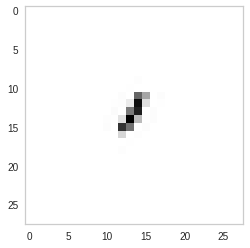

In [197]:
from matplotlib import pyplot as plt
plt.imshow(example_element['pixels'].numpy(), cmap='gray', aspect='equal')
plt.grid(False)
_ = plt.show()

## Exploring heterogeneity in federated data

Federated data is typically non-i.i.d., users typically have different distributions of data depending on usage patterns. Some clients may have fewer training examples on device, suffering from data paucity locally, while some clients will have more than enough training examples. Let's explore this concept of data heterogeneity typical of a federated system with the EMNIST data we have available. It's important to note that this deep analysis of a client's data is only available to us because this is a simulation environment where all the data is available to us locally. In a real production federated environment you would not be able to inspect a single client's data.

First, let's grab a sampling of one client's data to get a feel for the examples on one simulated device. Because the dataset we're using has been keyed by unique writer, the data of one client represents the handwriting of one person for a sample of the digits 0 through 9, simulating the unique "usage pattern" of one user.

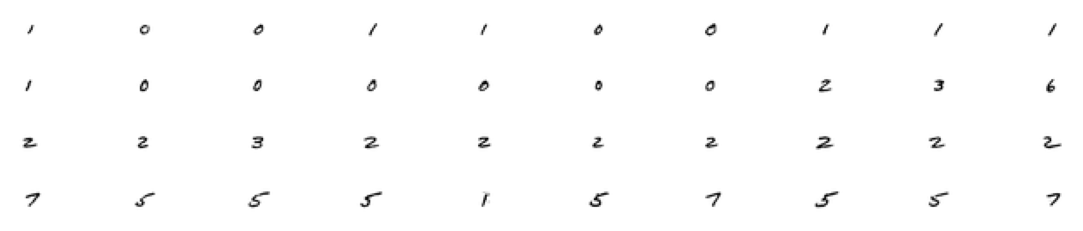

In [198]:
figure = plt.figure(figsize=(20, 4))
j = 0

for example in example_dataset.take(40):
  plt.subplot(4, 10, j+1)
  plt.imshow(example['pixels'].numpy(), cmap='gray', aspect='equal')
  plt.axis('off')
  j += 1

Now let's visualize the number of examples on each client for each MNIST digit label. In the federated environment, the number of examples on each client can vary quite a bit, depending on user behavior.

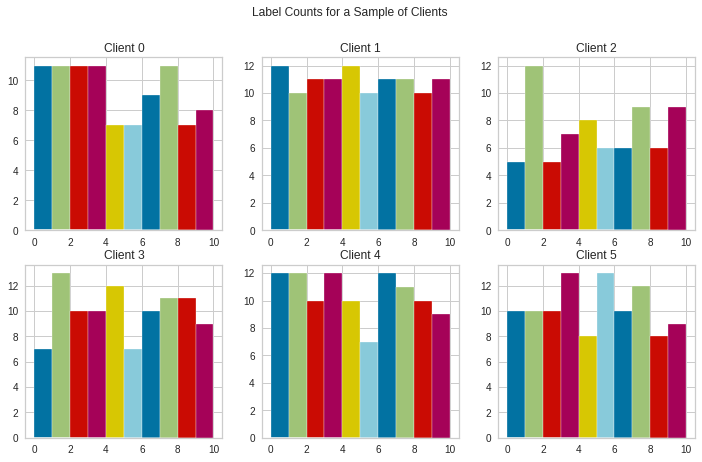

In [199]:
# Number of examples per layer for a sample of clients
f = plt.figure(figsize=(12, 7))
f.suptitle('Label Counts for a Sample of Clients')
for i in range(6):
  client_dataset = emnist_train.create_tf_dataset_for_client(
      emnist_train.client_ids[i])
  plot_data = collections.defaultdict(list)
  for example in client_dataset:
    # Append counts individually per label to make plots
    # more colorful instead of one color per plot.
    label = example['label'].numpy()
    plot_data[label].append(label)
  plt.subplot(2, 3, i+1)
  plt.title('Client {}'.format(i))
  for j in range(10):
    plt.hist(
        plot_data[j],
        density=False,
        bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

Now let's visualize the mean image per client for each MNIST label. This code will produce the mean of each pixel value for all of the user's examples for one label. We'll see that one client's mean image for a digit will look different than another client's mean image for the same digit, due to each person's unique handwriting style. We can muse about how each local training round will nudge the model in a different direction on each client, as we're learning from that user's own unique data in that local round. Later in the tutorial we'll see how we can take each update to the model from all the clients and aggregate them together into our new global model, that has learned from each of our client's own unique data.

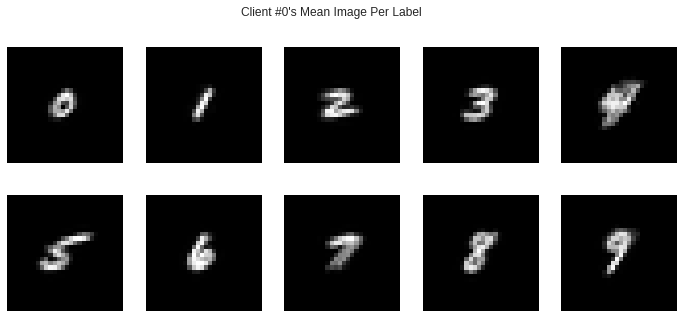

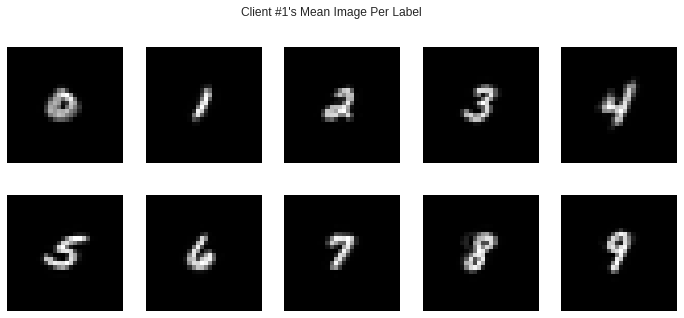

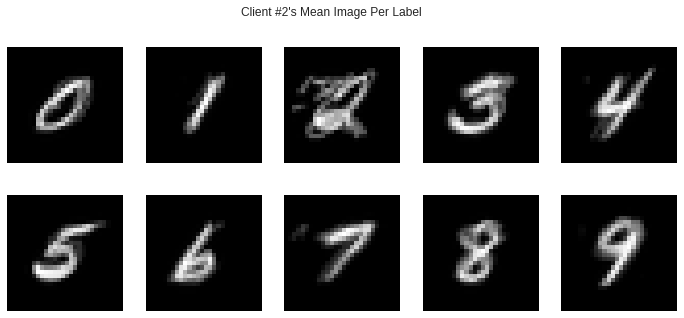

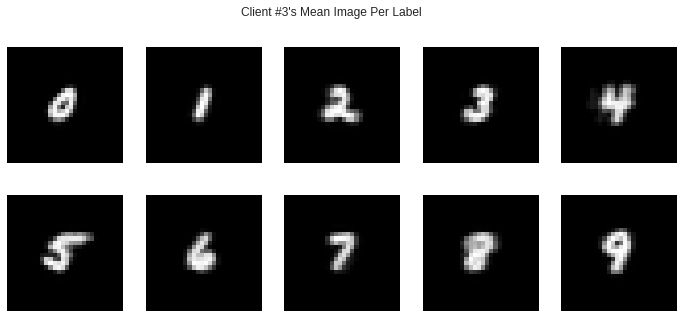

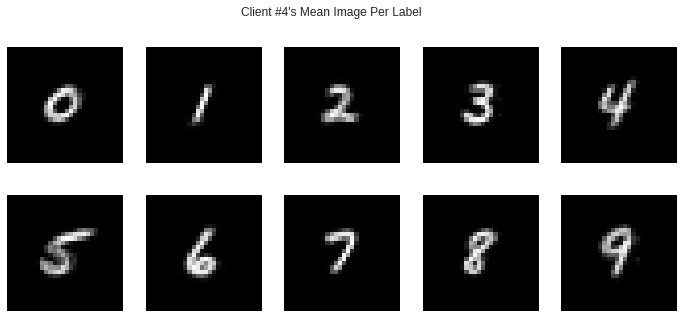

In [200]:
# Each client has different mean images, meaning each client will be nudging
# the model in their own directions locally.

for i in range(5):
  client_dataset = emnist_train.create_tf_dataset_for_client(
      emnist_train.client_ids[i])
  plot_data = collections.defaultdict(list)
  for example in client_dataset:
    plot_data[example['label'].numpy()].append(example['pixels'].numpy())
  f = plt.figure(i, figsize=(12, 5))
  f.suptitle("Client #{}'s Mean Image Per Label".format(i))
  for j in range(10):
    mean_img = np.mean(plot_data[j], 0)
    plt.subplot(2, 5, j+1)
    plt.imshow(mean_img.reshape((28, 28)))
    plt.axis('off')

## Preprocessing the input data
Since the data is already a tf.data.Dataset, preprocessing can be accomplished using Dataset transformations. Here, we flatten the 28x28 images into 784-element arrays, shuffle the individual examples, organize them into batches, and rename the features from pixels and label to x and y for use with Keras. We also throw in a repeat over the data set to run several epochs.


In [201]:
NUM_CLIENTS = 10
NUM_EPOCHS = 5
BATCH_SIZE = 20
SHUFFLE_BUFFER = 100
PREFETCH_BUFFER = 10

def preprocess(dataset):

  def batch_format_fn(element):
    """Flatten a batch `pixels` and return the features as an `OrderedDict`."""
    return collections.OrderedDict(
        x=tf.reshape(element['pixels'], [-1, 784]),
        y=tf.reshape(element['label'], [-1, 1]))

  return dataset.repeat(NUM_EPOCHS).shuffle(SHUFFLE_BUFFER, seed=1).batch(
      BATCH_SIZE).map(batch_format_fn).prefetch(PREFETCH_BUFFER)

In [202]:
preprocessed_example_dataset = preprocess(example_dataset)

sample_batch = tf.nest.map_structure(lambda x: x.numpy(),
                                     next(iter(preprocessed_example_dataset)))

sample_batch

OrderedDict([('x', array([[1., 1., 1., ..., 1., 1., 1.],
                     [1., 1., 1., ..., 1., 1., 1.],
                     [1., 1., 1., ..., 1., 1., 1.],
                     ...,
                     [1., 1., 1., ..., 1., 1., 1.],
                     [1., 1., 1., ..., 1., 1., 1.],
                     [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)),
             ('y', array([[2],
                     [1],
                     [5],
                     [7],
                     [1],
                     [7],
                     [7],
                     [1],
                     [4],
                     [7],
                     [4],
                     [2],
                     [2],
                     [5],
                     [4],
                     [1],
                     [1],
                     [0],
                     [0],
                     [9]], dtype=int32))])

We have almost all the building blocks in place to construct federated data sets.

One of the ways to feed federated data to TFF in a simulation is simply as a Python list, with each element of the list holding the data of an individual user, whether as a list or as a tf.data.Dataset. Since we already have an interface that provides the latter, let's use it.

Here's a simple helper function that will construct a list of datasets from the given set of users as an input to a round of training or evaluation.

In [203]:
def make_federated_data(client_data, client_ids):
  return [
      preprocess(client_data.create_tf_dataset_for_client(x))
      for x in client_ids
  ]

Now, how do we choose clients?

In a typical federated training scenario, we are dealing with potentially a very large population of user devices, only a fraction of which may be available for training at a given point in time. This is the case, for example, when the client devices are mobile phones that participate in training only when plugged into a power source, off a metered network, and otherwise idle.

Of course, we are in a simulation environment, and all the data is locally available. Typically then, when running simulations, we would simply sample a random subset of the clients to be involved in each round of training, generally different in each round.

That said, as you can find out by studying the paper on the Federated Averaging algorithm, achieving convergence in a system with randomly sampled subsets of clients in each round can take a while, and it would be impractical to have to run hundreds of rounds in this interactive tutorial.

What we'll do instead is sample the set of clients once, and reuse the same set across rounds to speed up convergence (intentionally over-fitting to these few user's data). 

In [204]:
sample_clients = emnist_train.client_ids[0:NUM_CLIENTS]

federated_train_data = make_federated_data(emnist_train, sample_clients)

print(f'Number of client datasets: {len(federated_train_data)}')
print(f'First dataset: {federated_train_data[0]}')

Number of client datasets: 10
First dataset: <PrefetchDataset element_spec=OrderedDict([('x', TensorSpec(shape=(None, 784), dtype=tf.float32, name=None)), ('y', TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))])>


## Creating a model with Keras
If you are using Keras, you likely already have code that constructs a Keras model. Here's an example of a simple model that will suffice for our needs.

In [205]:
def create_keras_model():
  return tf.keras.models.Sequential([
      tf.keras.layers.InputLayer(input_shape=(784,)),
      tf.keras.layers.Dense(10, kernel_initializer='zeros'),
      tf.keras.layers.Softmax(),
  ])

In [206]:
def model_fn():
  # We _must_ create a new model here, and _not_ capture it from an external
  # scope. TFF will call this within different graph contexts.
  keras_model = create_keras_model()
  return tff.learning.from_keras_model(
      keras_model,
      input_spec=preprocessed_example_dataset.element_spec,
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

## Training the model on federated data

Now that we have a model wrapped as tff.learning.Model for use with TFF, we can let TFF construct a Federated Averaging algorithm by invoking the helper function tff.learning.build_federated_averaging_process, as follows.

Keep in mind that the argument needs to be a constructor (such as model_fn above), not an already-constructed instance, so that the construction of your model can happen in a context controlled by TFF (if you're curious about the reasons for this, we encourage you to read the follow-up tutorial on custom algorithms).

One critical note on the Federated Averaging algorithm below, there are 2 optimizers: a _clientoptimizer and a _serveroptimizer. The _clientoptimizer is only used to compute local model updates on each client. The _serveroptimizer applies the averaged update to the global model at the server. In particular, this means that the choice of optimizer and learning rate used may need to be different than the ones you have used to train the model on a standard i.i.d. dataset. We recommend starting with regular SGD, possibly with a smaller learning rate than usual. The learning rate we use has not been carefully tuned, feel free to experiment.

In [207]:
iterative_process = tff.learning.build_federated_averaging_process(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=0.02),
    server_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=1.0))

What just happened? TFF has constructed a pair of federated computations and packaged them into a tff.templates.IterativeProcess in which these computations are available as a pair of properties initialize and next.

In a nutshell, federated computations are programs in TFF's internal language that can express various federated algorithms (you can find more about this in the custom algorithms tutorial). In this case, the two computations generated and packed into iterative_process implement Federated Averaging.

It is a goal of TFF to define computations in a way that they could be executed in real federated learning settings, but currently only local execution simulation runtime is implemented. To execute a computation in a simulator, you simply invoke it like a Python function. This default interpreted environment is not designed for high performance, but it will suffice for this tutorial; we expect to provide higher-performance simulation runtimes to facilitate larger-scale research in future releases.

Let's start with the initialize computation. As is the case for all federated computations, you can think of it as a function. The computation takes no arguments, and returns one result - the representation of the state of the Federated Averaging process on the server. While we don't want to dive into the details of TFF, it may be instructive to see what this state looks like. You can visualize it as follows.

In [208]:
print(iterative_process.initialize.type_signature.formatted_representation())

( -> <
  model=<
    trainable=<
      float32[784,10],
      float32[10]
    >,
    non_trainable=<>
  >,
  optimizer_state=<
    int64
  >,
  delta_aggregate_state=<
    value_sum_process=<>,
    weight_sum_process=<>
  >,
  model_broadcast_state=<>
>@SERVER)


While the above type signature may at first seem a bit cryptic, you can recognize that the server state consists of a model (the initial model parameters for MNIST that will be distributed to all devices), and optimizer_state (additional information maintained by the server, such as the number of rounds to use for hyperparameter schedules, etc.).

Let's invoke the initialize computation to construct the server state.

In [209]:
state = iterative_process.initialize()

The second of the pair of federated computations, next, represents a single round of Federated Averaging, which consists of pushing the server state (including the model parameters) to the clients, on-device training on their local data, collecting and averaging model updates, and producing a new updated model at the server.

Let's run a single round of training and visualize the results. We can use the federated data we've already generated above for a sample of users.


In [210]:
state, metrics = iterative_process.next(state, federated_train_data)
print('round  1, metrics={}'.format(metrics))

round  1, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('train', OrderedDict([('sparse_categorical_accuracy', 0.12345679), ('loss', 3.1193743), ('num_examples', 4860), ('num_batches', 248)]))])


Let's run a few more rounds. As noted earlier, typically at this point you would pick a subset of your simulation data from a new randomly selected sample of users for each round in order to simulate a realistic deployment in which users continuously come and go, but in this interactive notebook, for the sake of demonstration we'll just reuse the same users, so that the system converges quickly.

In [211]:
NUM_ROUNDS = 11
for round_num in range(2, NUM_ROUNDS):
  state, metrics = iterative_process.next(state, federated_train_data)
  print('round {:2d}, metrics={}'.format(round_num, metrics))

round  2, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('train', OrderedDict([('sparse_categorical_accuracy', 0.13518518), ('loss', 2.9834726), ('num_examples', 4860), ('num_batches', 248)]))])
round  3, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('train', OrderedDict([('sparse_categorical_accuracy', 0.14382716), ('loss', 2.8616652), ('num_examples', 4860), ('num_batches', 248)]))])
round  4, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('train', OrderedDict([('sparse_categorical_accuracy', 0.17407407), ('loss', 2.795702), ('num_examples', 4860), ('num_batches', 248)]))])
round  5, metrics=OrderedDict([('broadcast', ()), ('aggregation', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('train', OrderedDict([('sparse_categorical_accuracy', 0.19917695), ('loss', 2.6146572), ('n

# Homework

In this notebook we explored a variety of sampling methods, as well as their applications to machine and deep learning. We then explored annotations of your data (these are often what powers our deep models!), and how to identify reliable annotations. These concepts will be crucial as we discover active learning in the next tutorial. 

In this notebook's exercises, you will use these concepts in the context of your social scientific data and experiments.

**1)** Run 3 probabilistic sampling methods and 2 non-probabilistic methods and explore the samples returned. How would sampling help with your data?

In [212]:
sampling_help = 'value' #@param {type:"string"}

**2)** Find an imbalanced dataset and build a classifier to predict the label causing the imbalance. Explore undersampling and oversampling solutions to your dataset.

**3)** Use bootstrap sampling to test the stability of a word, sentence, or graph embedding.

**4)** Perform an annotation survey of some kind in which at least 3 people evaluate and code each piece of content, using Amazon Mechanical Turk as described in the link below, or by hand with friends.  With the resulting data, calculate, visualize and discuss inter-coder agreement or covariation with appropriate metrics. What does this means for the reliability of human labeling assessments in your domain?

Run your own survey and annotations: [MTurk tutorial](https://canvas.uchicago.edu/courses/33672/files/4767031/download).



In [213]:
reliability = 'value' #@param {type:"string"}


**5)** In the cells immediately following, use the results of your content annotation survey to predict high and low-quality analysts, then predict MAP estimates for your codes in question. What do these estimates suggest about the distribution of skill among your coders? How different are these estimates from a majority vote?

In [214]:
reliability = 'value' #@param {type:"string"}